### Table of contents <a name="TOC"></a>

* [Introduction](#introduction)
* [Single plot](#single_plot)
* [Multiple plots](#multiple_plots)
* [Ticks and labels](#ticks)
* [Exercises](#exercises)

# Introduction <a name="introduction"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this introduction, we'll see how to make a [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) and play with the different settings such as to improve the rendering. We'll also see how to compose a figure made of several [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) with a moderatly complex layout.



<img src="data/anatomy.png" width="50%" align="left" /> <img src="data/subplots.png" width="50%" />


These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets).


# Single plot <a name="single_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

We'll start by playing with a very simple exampe (sine and cosine trigonometric functions) using the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function and see what options are avalaible to us. We'll see there exists a (very) large number of options that allow to obtain quite different outputs. More precisely, you can modify any aspect of a figure and obtain the precise rendering you've in mind. The only difficulty is to know what are these options and how to apply them.

## Data preparation

Before starting any plot, we need first to have some data to plot. Such data can originate from your own experiment or analysis but for the sake of simplicity, we'll generate our own data using the [numpy](https://numpy.org) library. For the sine and cosine functions, we simply generate 257 values linearly spaced between -π and +π and we compute the sine and cosine of these values.

In [17]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 257, endpoint=True)
C, S = np.cos(X), np.sin(X)

X is now a numpy array with 257 values ranging from -π to +π (included). C is the cosine (257 values) and S is the sine (257 values). We're ready to plot them.

**Note** The standard way of importing maplotlib is to write `import matplotlib.pyplot as plt` and then use the `plt` prefix in front of matplotlib related functions. In some rather rare cases, we also use the `matplotlib` prefix, but most of the time we only need `plt`.

## Implicit defaults

Let's draw our first figure and observe what the result looks like.

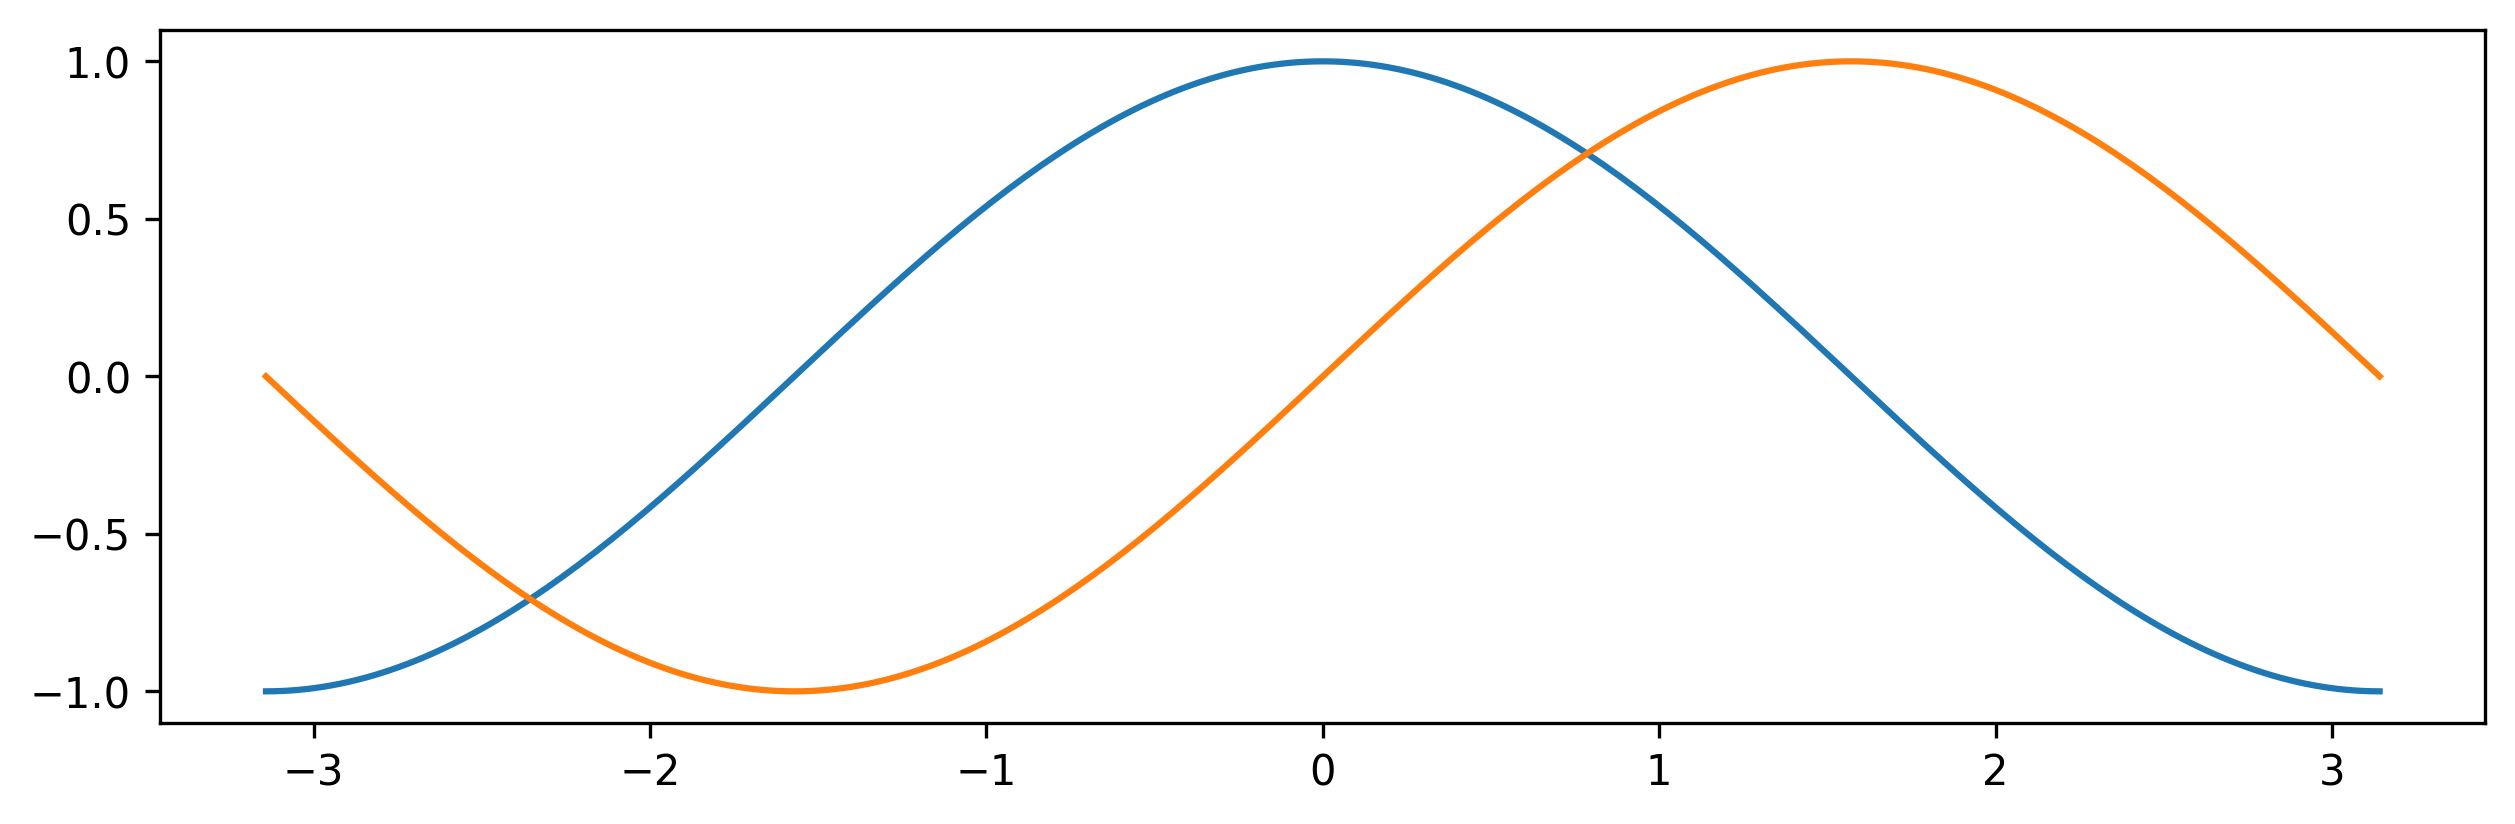

In [18]:
import matplotlib.pyplot as plt

plt.plot(X, C)
plt.plot(X, S)
plt.show();

**Note** The value `257` is a bit arbitrary and not that important. However, if you use too few values, the plot will appear "broken" (or even wrong in some cases) The reason is that matplotlib uses linear interpolation between points: 

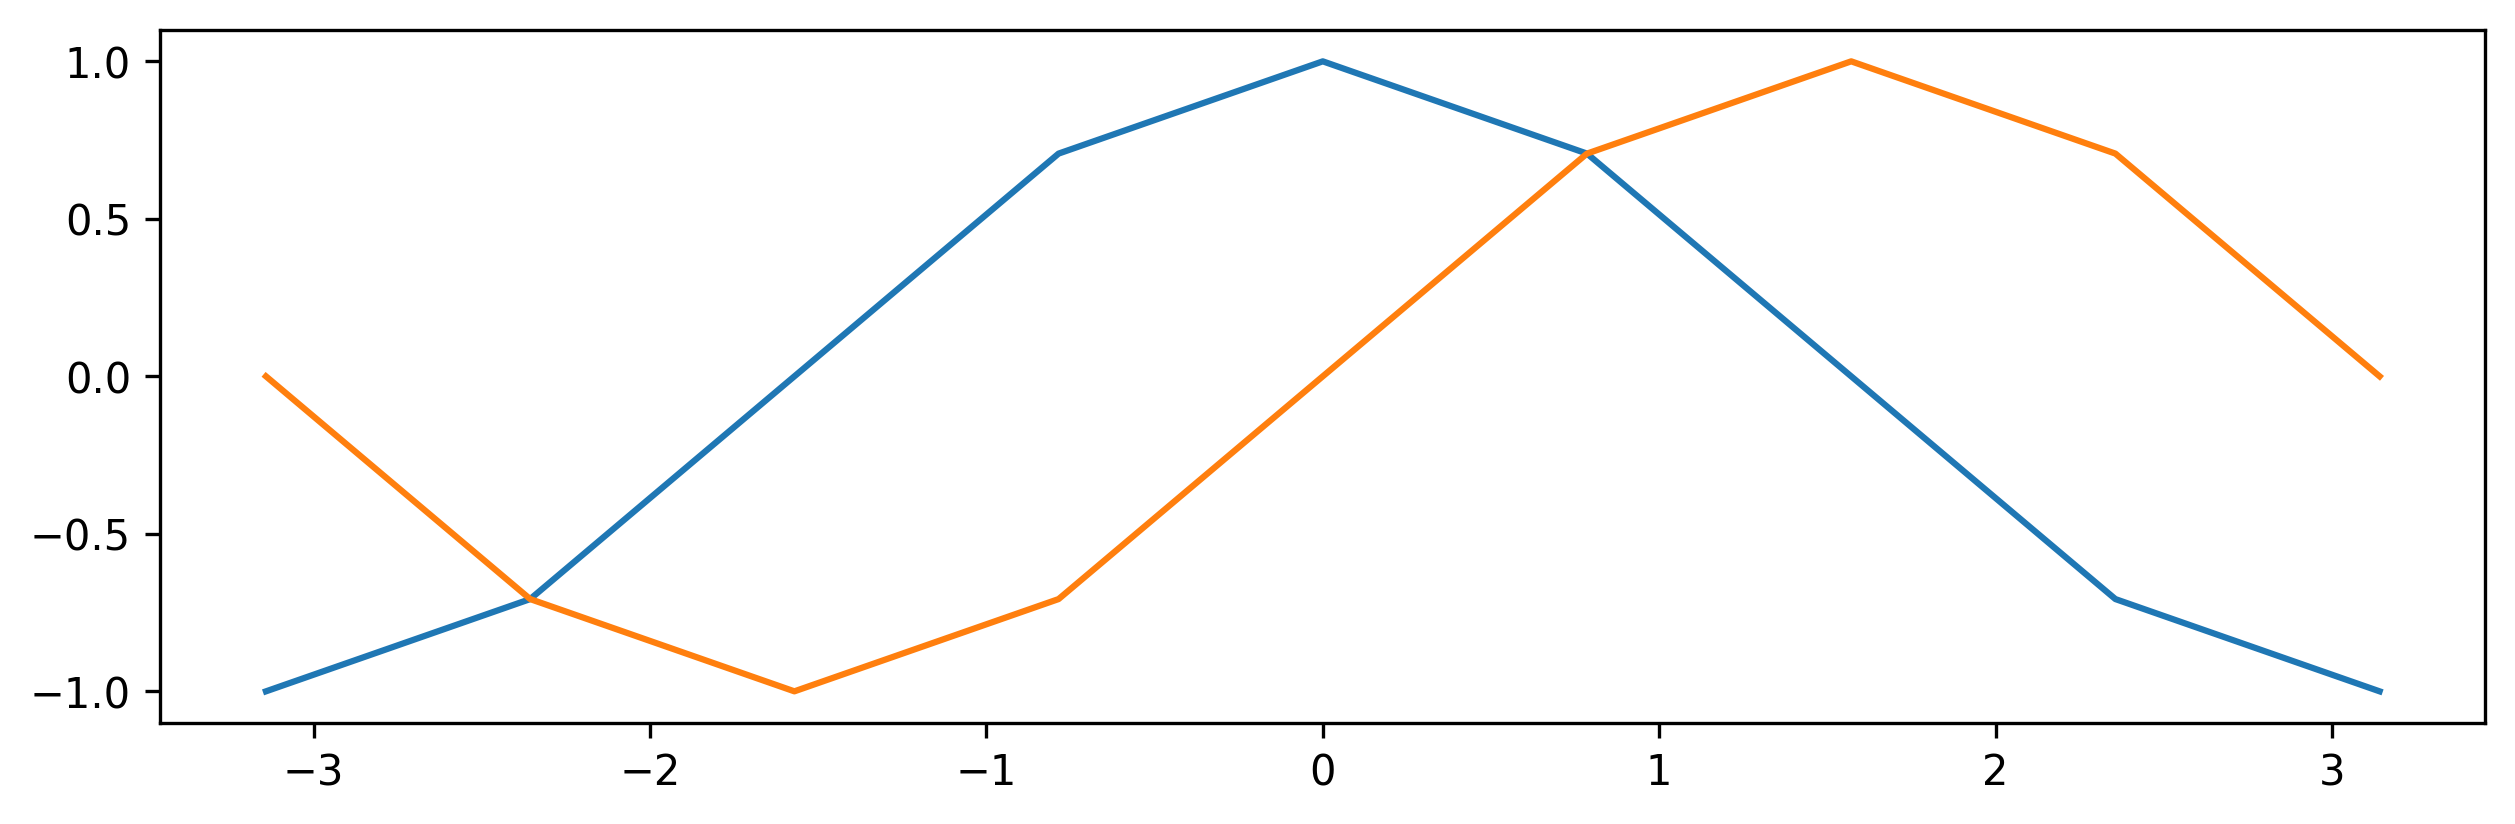

In [19]:
import matplotlib.pyplot as plt

plt.plot(X[::32], C[::32])
plt.plot(X[::32], S[::32])
plt.show();

Reciprocally, if you use too much values, the plot will be correct but the computing of values and the rendering will be slower.

## Explicit defaults

Let's now try to do the exact same figure as above, but this time we'll specify everything. To do so, we need to read these defaults from the [maplotlibrc](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files) configuration file that is accessible through the `plt.rcParams` variable. 

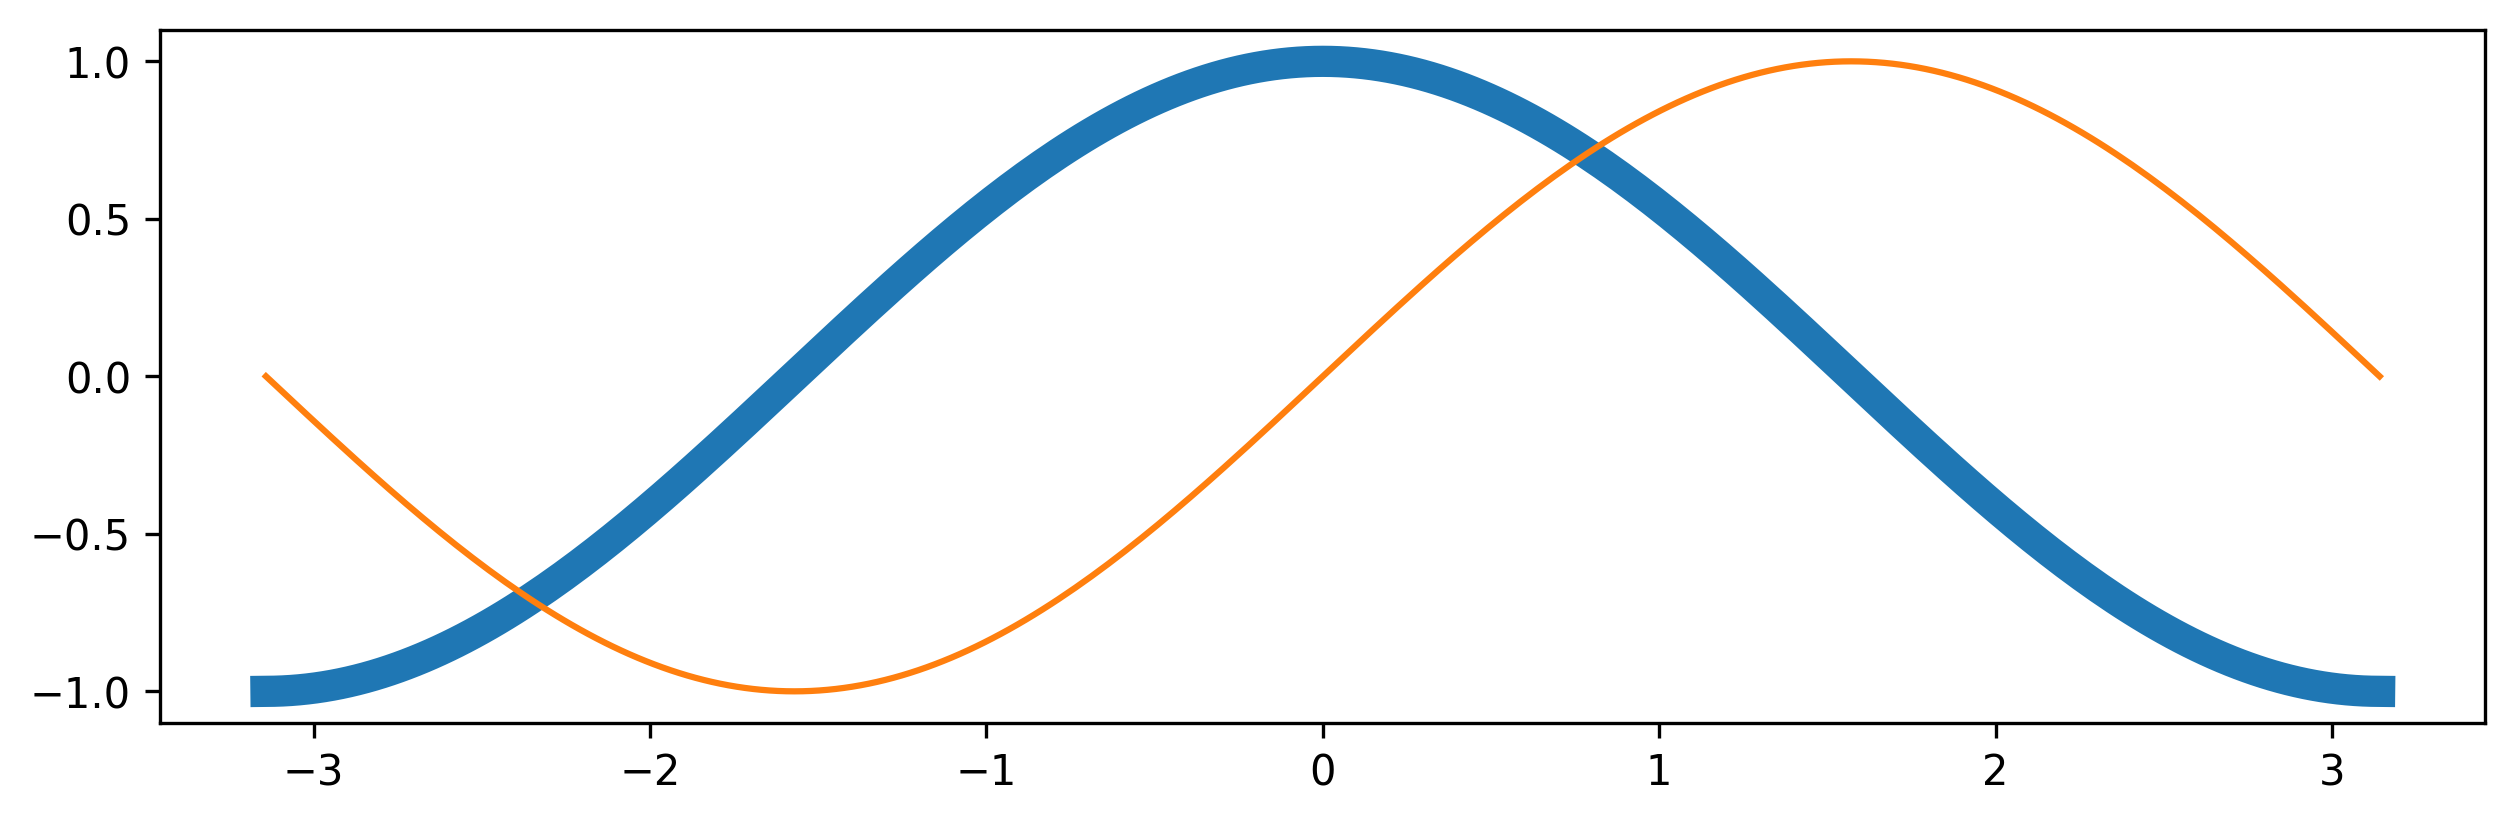

In [20]:
p = plt.rcParams

fig = plt.figure(figsize = p['figure.figsize'],
                 dpi = p['figure.dpi'],
                 facecolor = p['figure.facecolor'],
                 edgecolor = p['figure.edgecolor'],
                 frameon = p['figure.frameon'])

ax = plt.subplot()
                   
ax.plot(X, C, color="C0",
              linewidth = 5*p['lines.linewidth'],
              linestyle = p['lines.linestyle'])

ax.plot(X, S, color="C1",
              linewidth = p['lines.linewidth'],
              linestyle = p['lines.linestyle'])

xmin, xmax = X.min(), X.max()
xmargin = p['axes.xmargin']*(xmax - xmin)
ax.set_xlim(xmin - xmargin, xmax + xmargin)

ymin, ymax = min(C.min(), S.min()), max(C.max(), S.max())
ymargin = p['axes.ymargin']*(ymax - ymin)
ax.set_ylim(ymin - ymargin, ymax + ymargin)

ax.tick_params(axis = "x", which="major",
               direction = p['xtick.direction'],
               length = p['xtick.major.size'],
               width = p['xtick.major.width'])

ax.tick_params(axis = "y", which="major",
               direction = p['ytick.direction'],
               length = p['ytick.major.size'],
               width = p['ytick.major.width'])

plt.show();

In [21]:
print("figure.figsize:  ", p['figure.figsize'])
print("figure.dpi:      ", p['figure.dpi'])
print("figure.facecolor:", p['figure.facecolor'])
print("figure.edgecolor:", p['figure.edgecolor'])
print("figure.frameon:  ", p['figure.frameon'])

figure.figsize:   [10.0, 3.0]
figure.dpi:       300.0
figure.facecolor: white
figure.edgecolor: white
figure.frameon:   True


In [22]:
import re
import pandas as pd
from IPython.display import display, HTML

def defaults(pattern = "*"):
    p = plt.rcParams
    r = re.compile(pattern)
    keys = list(filter(r.match, p.keys()))
    data = {key:p[key] for key in keys}
    frame = pd.DataFrame(data.values(), index=data.keys(),
                         columns=['Default value'])
    display( frame )
    
defaults("figure*")

,Default value
figure.autolayout,False
figure.constrained_layout.h_pad,0.04167
figure.constrained_layout.hspace,0.02
figure.constrained_layout.use,False
figure.constrained_layout.w_pad,0.04167
figure.constrained_layout.wspace,0.02
figure.dpi,300.0
figure.edgecolor,white
figure.facecolor,white
figure.figsize,"[10.0, 3.0]"


## Custom settings

As you can see from the script above, pretty much everything can be changed. So let's modify our figure to improve the rendering a bit. Now that we know what are the defaults, we can get back to the implicit version.

### Figure size

The plot appears a bit packed so let's first modify the figure size.
To do so, we need to create it explicitely in order to specify a size in inches. Let's try 10 inches wide and 3 inches tall. We'll also use an Axes ( `ax` ) which can be considered as a subfigure and we'll increase the DPI (dots per inch) of the figure to get a better resolution in the notebook.

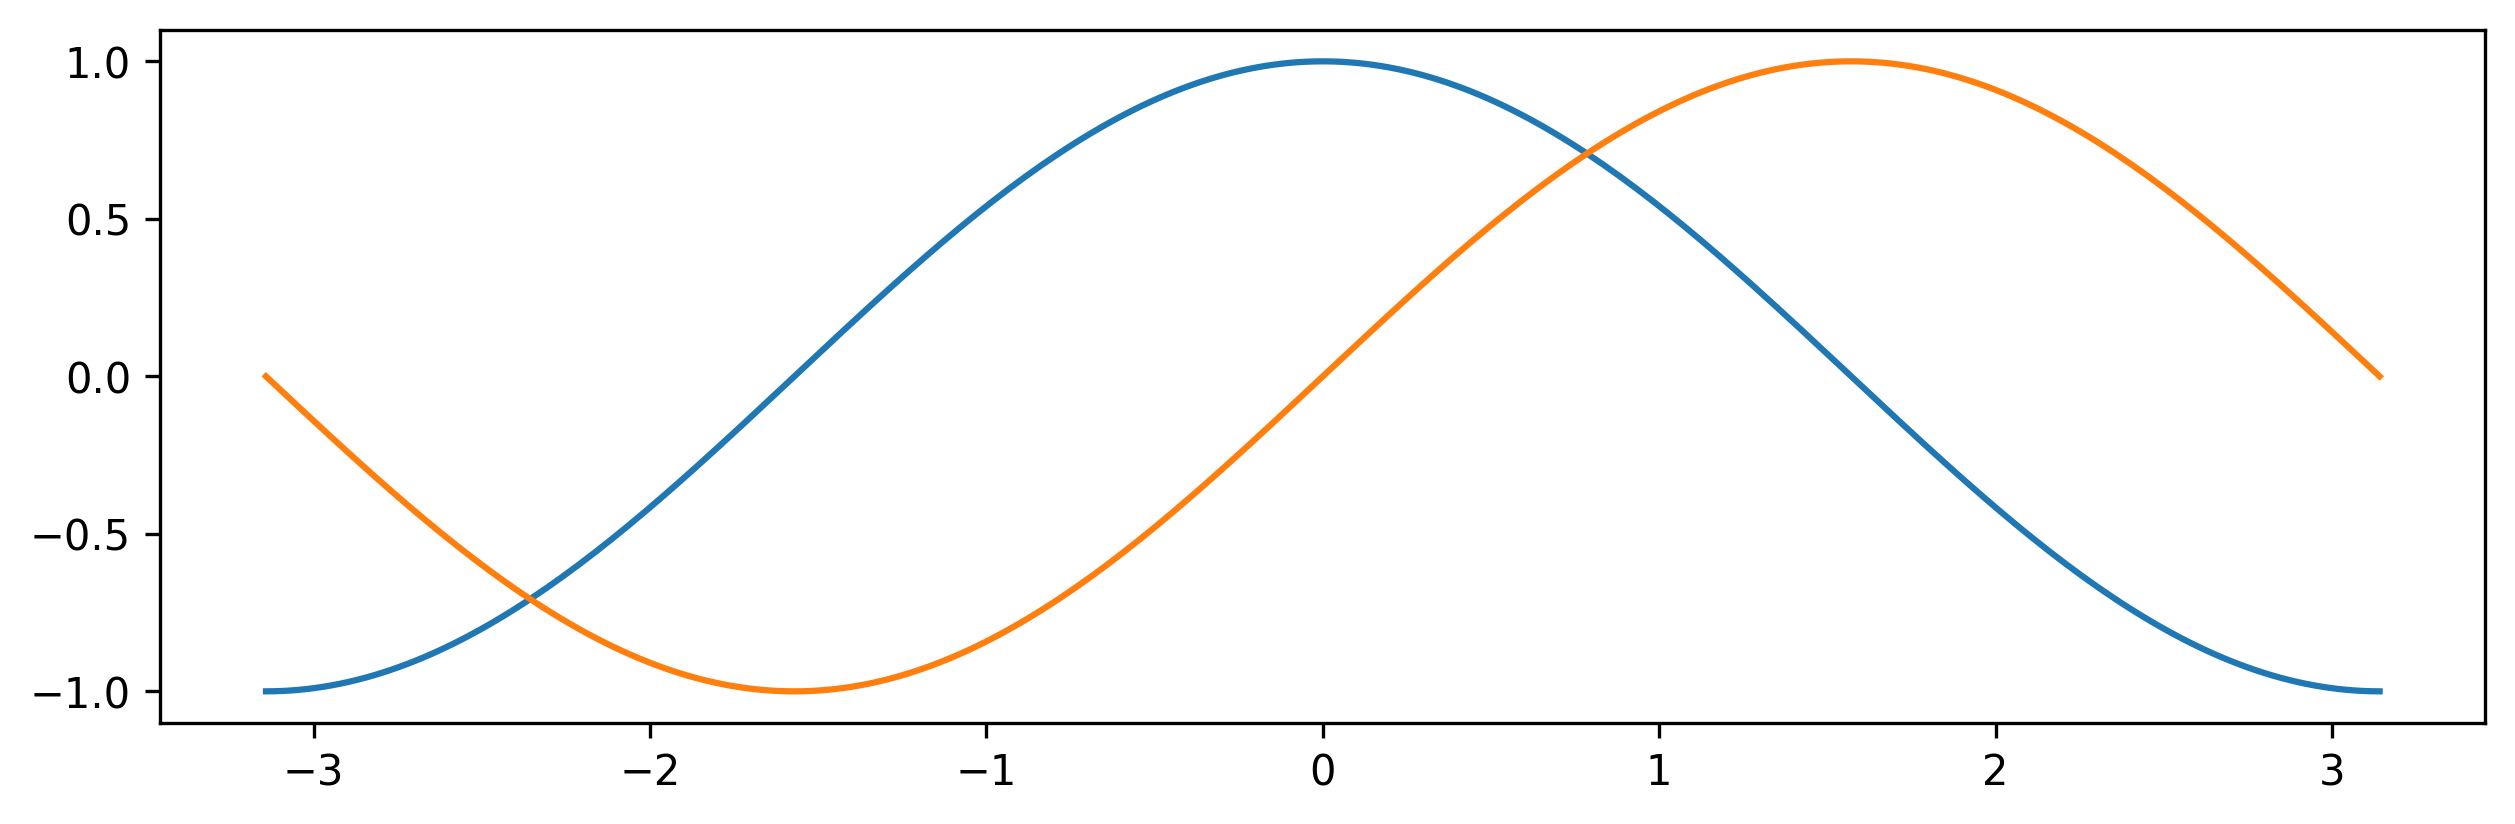

In [23]:
p = plt.rcParams

# Set default figure size 
p["figure.figsize"] = (10,3) 

# Set default figure dpi
p["figure.dpi"] = 300

fig,ax = plt.subplots()
ax.plot(X, C)
ax.plot(X, S)

plt.show();

**Important** Since we modified `rcParams`, this will influence all subsequent figures in this notebook, including the top figures.

### Line styles

Solid line is the default line style but there exist several other styles such as dashed lines ( `linestyle="--"` ), dotted lines ( `linestyle=":"` ), etc. You can also combine a style with a marker. For example, we can add disc markers at regular intervals. To do that, we specify the `marker` symbol, the marker color and the spacing between markers (else you will have a marker at each data  point).

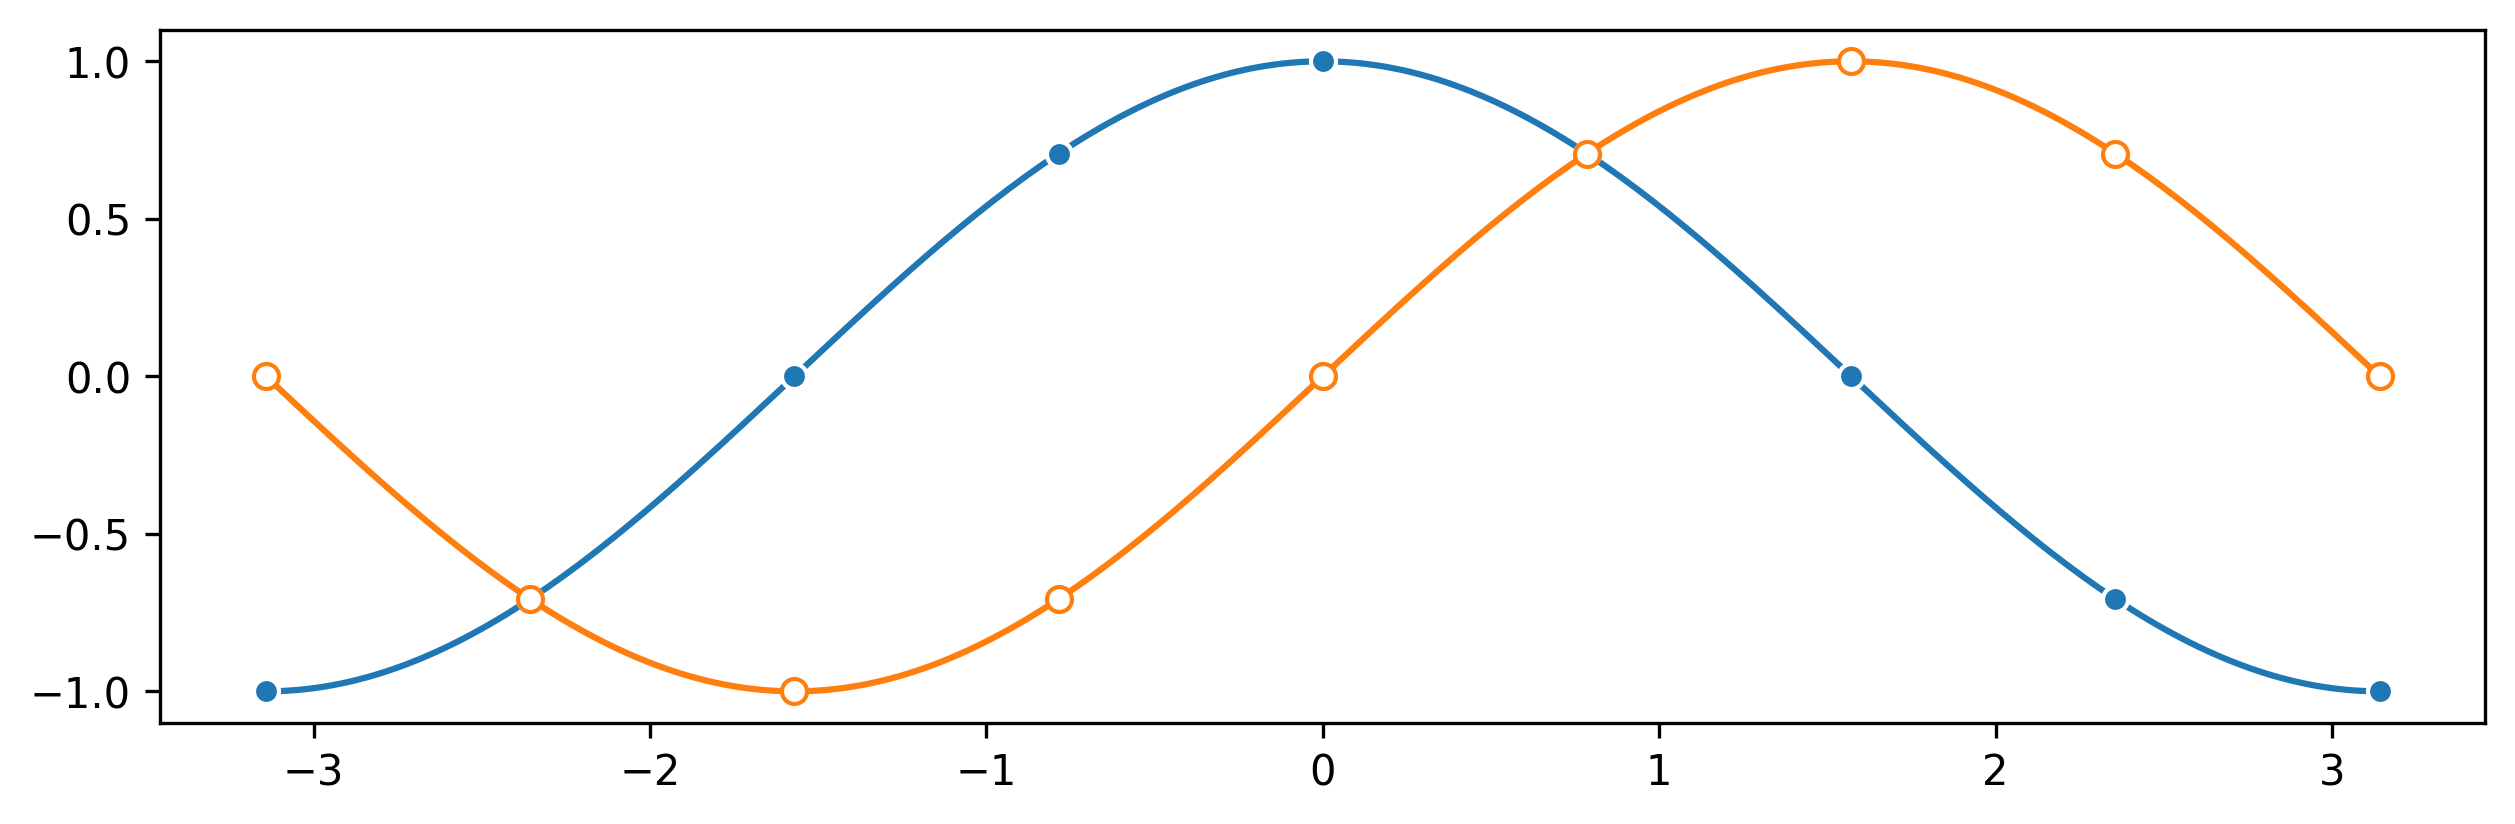

In [24]:
fig,ax = plt.subplots()
ax.plot(X, C, marker="o", markevery=(0, 32),
                          markerfacecolor="C0",
                          markeredgecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32),
                          markerfacecolor="white")

plt.show();

### Tick positions

Ticks on the x axis are not ideal positioned because they do not show the interesting values (+/-π,+/-π/2) and there are too many ticks on the y axis. Let's change them.

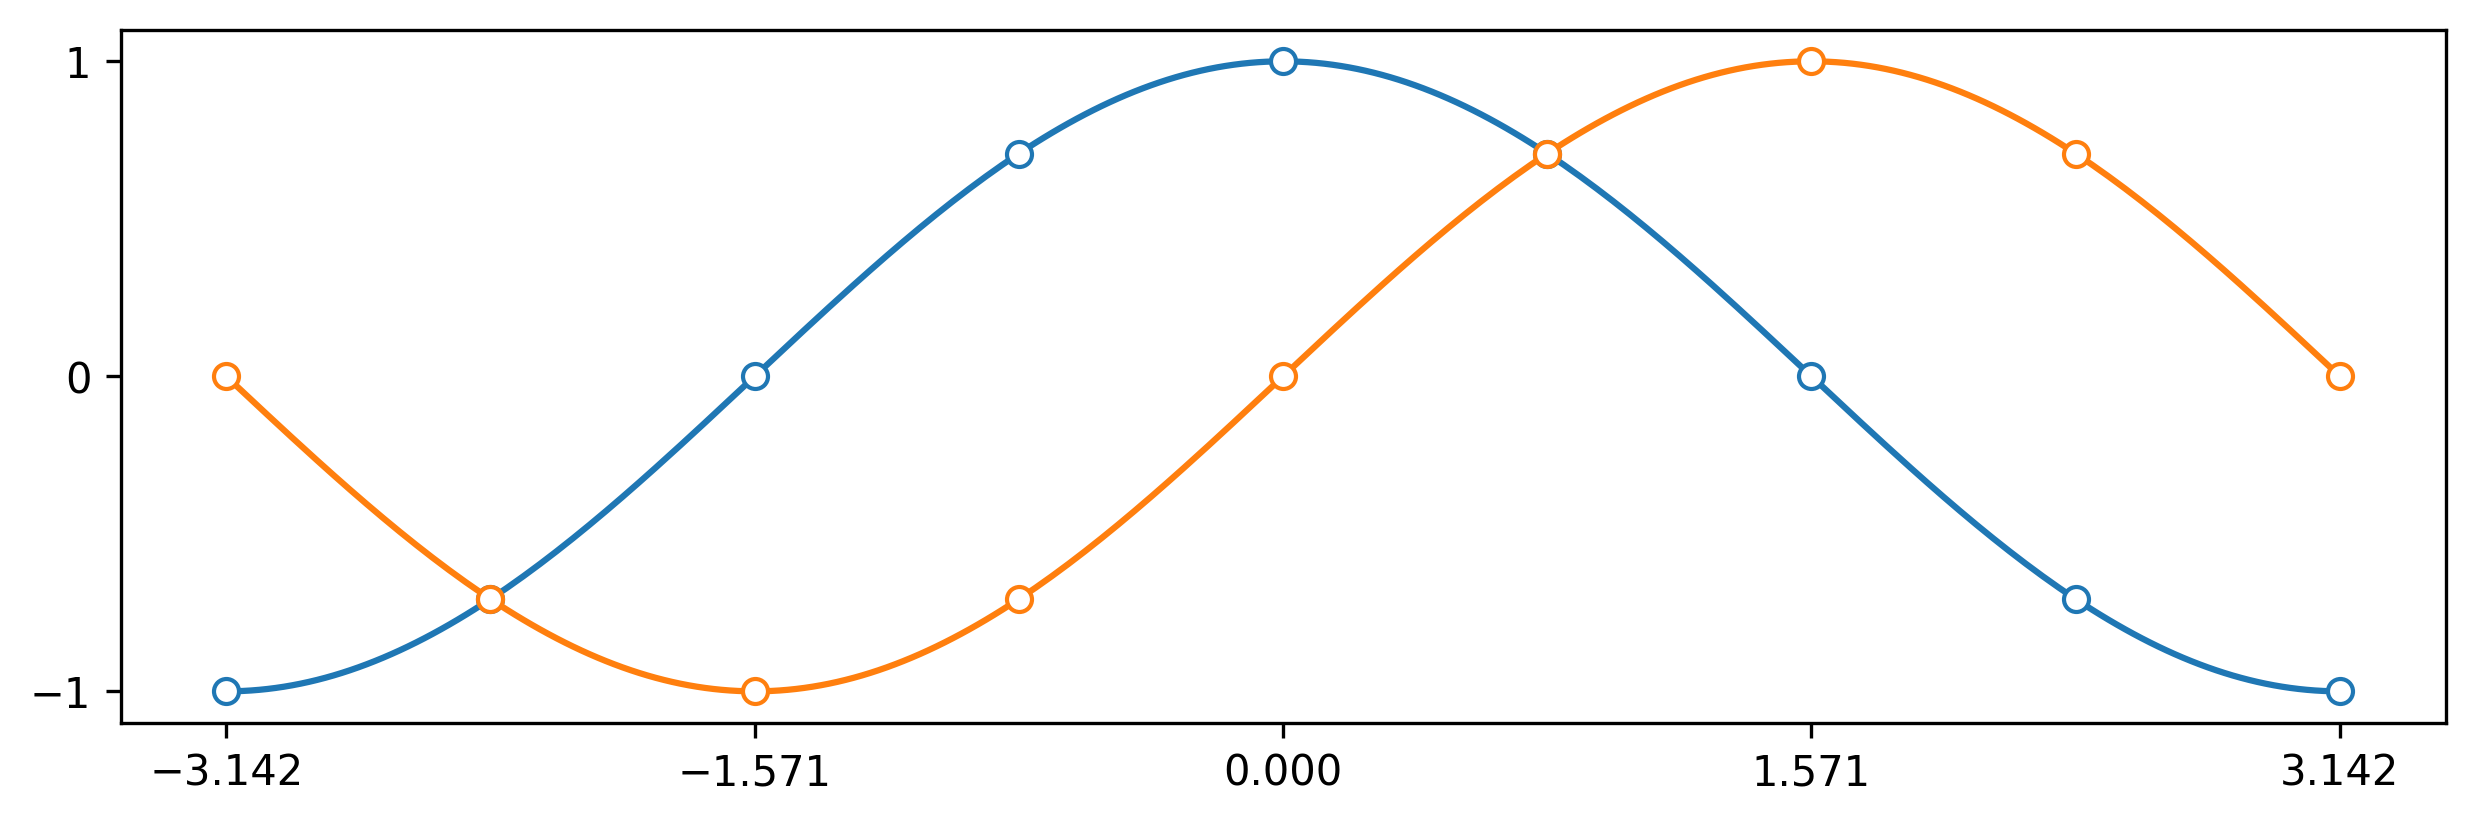

In [25]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

plt.show();

### Tick labels

Ticks are now properly placed but their labels are not very explicit. We could guess that 3.142 is π but it would be better to make it explicit. Let's change labels then.

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3k/s8vv032x2hx5kgfs3dzpbqjc0000gn/T/ipykernel_7640/623918162.py:7: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xticklabels(["-$\pi$", r"-$\pi$/2", "0", "π/2", "π"])


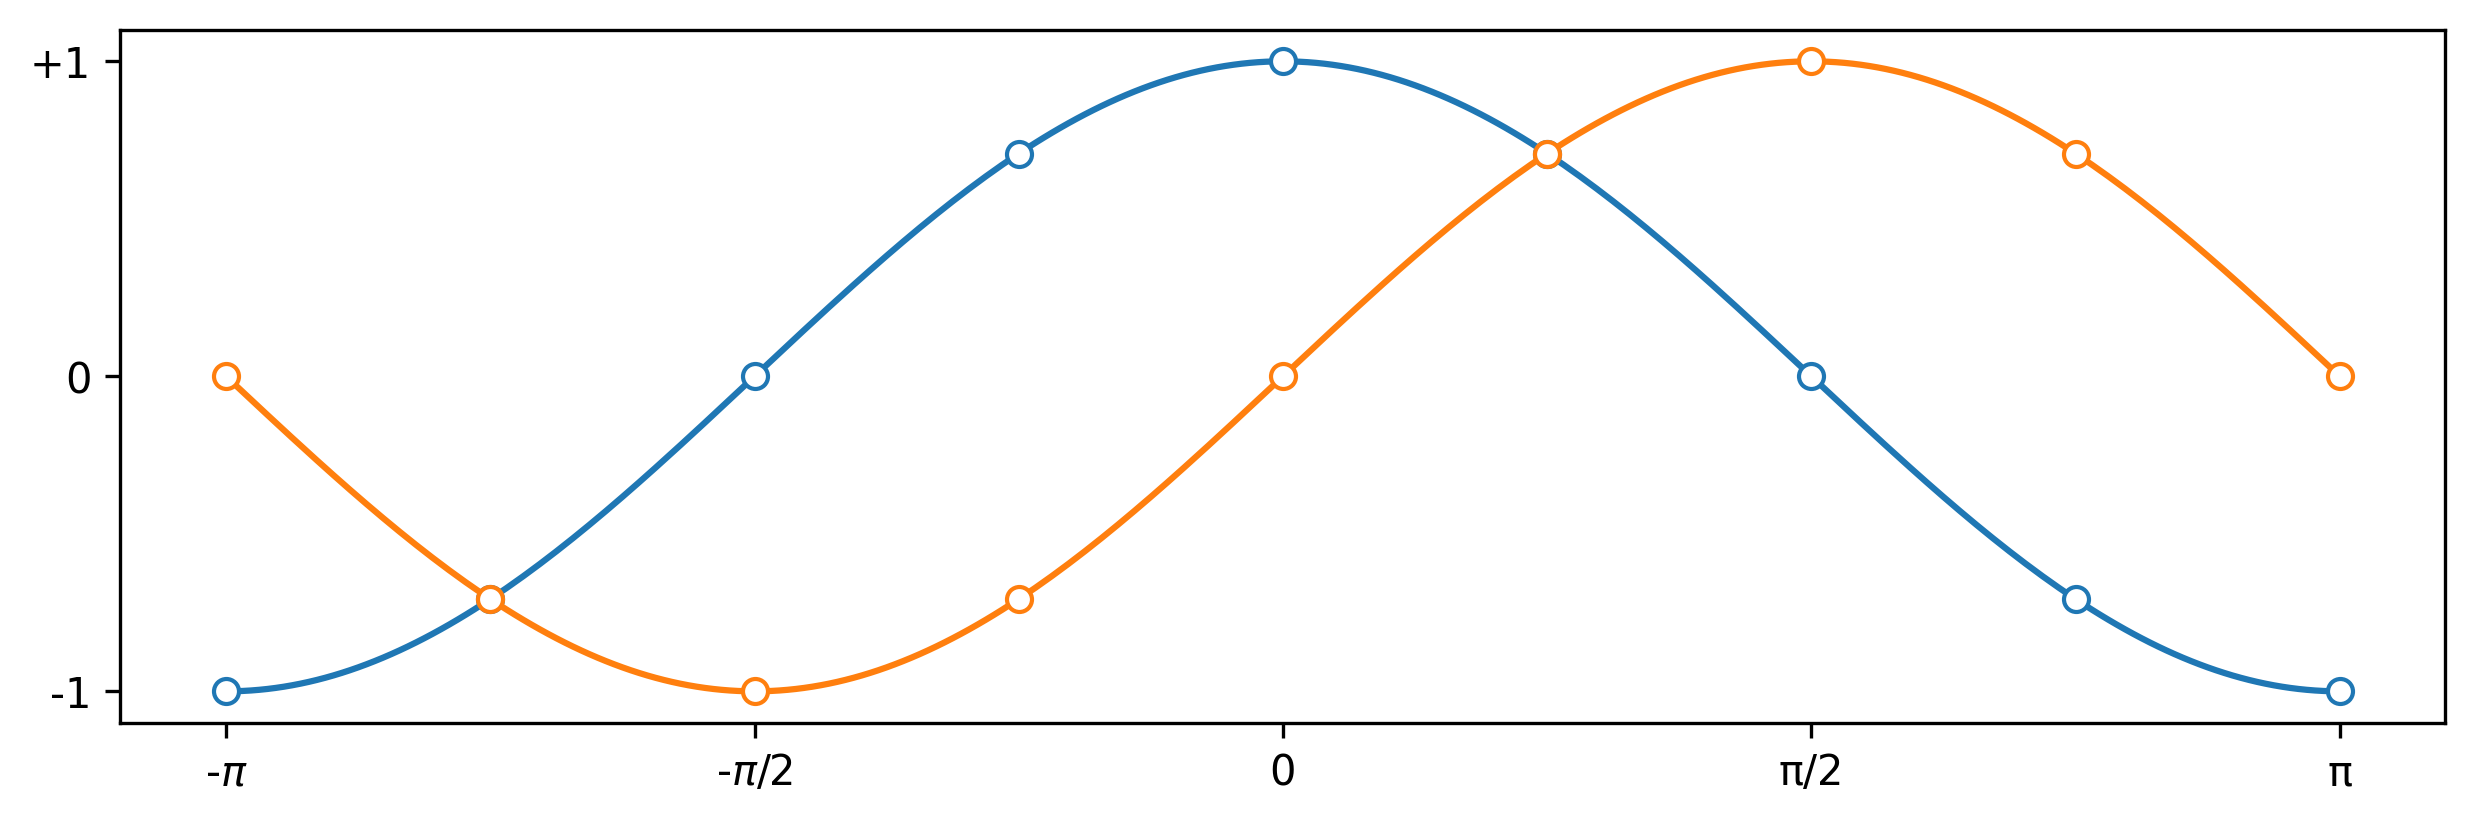

In [26]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r"-$\pi$", r"-$\pi$/2", "0", "π/2", "π"])
ax.set_yticks([-1,0,1])
ax.set_yticklabels(["-1", "0", "+1"])

plt.show();

### Spines position

Spines are the four lines around our figure and delimiting the data area. Byt default, there are four spines at top/bottom and left/right but we can hide some of them and move the others. Since there are four of them (top/bottom/left/right), we'll hide the top and right and we'll move the bottom and left ones to coordinate 0 (in data space coordinates).

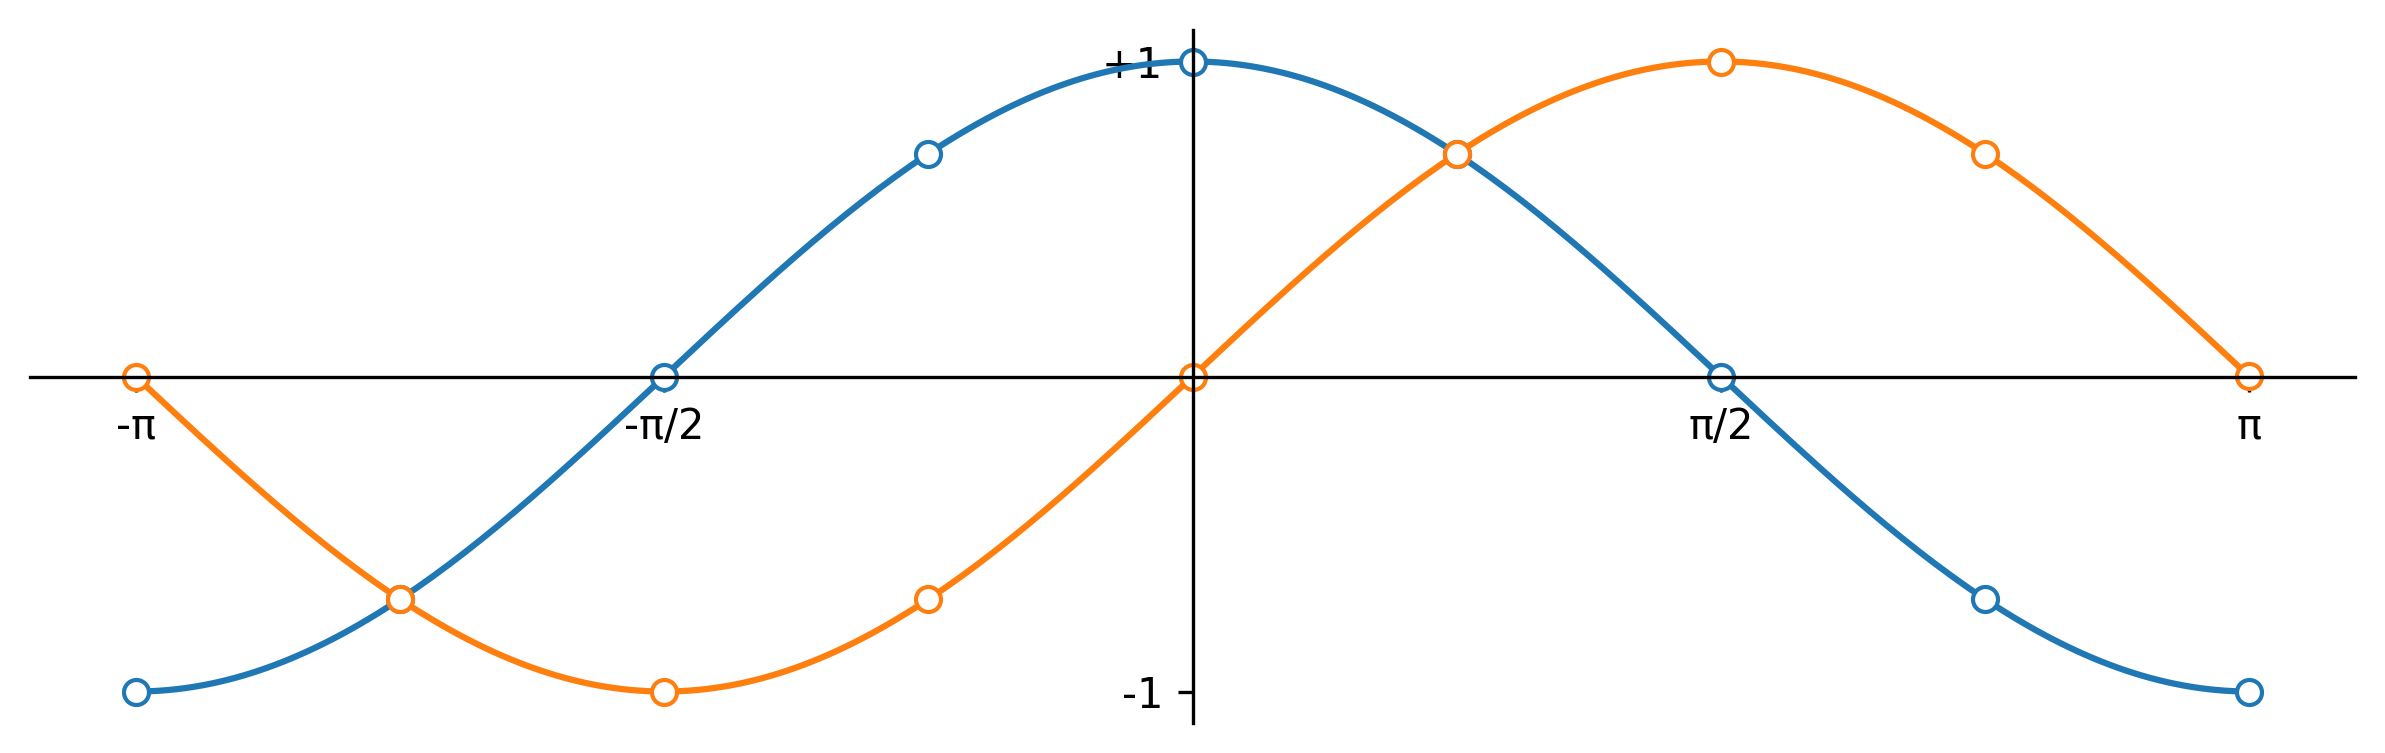

In [27]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1,1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show();

### Z order

If you look carefully at the figure above you can see that axis are above the plot. It was already the case previosuly but it was less noticeable. Now with the markers, it is more obvious and pretty annoying. To fix the problem, we need to tell matplotlib to render our sine and cosine plots in front of the axis. To do so, we need to specify a zorder that specify the order of rendering. Elements are rendererd in increasing zorder. Knowing that the axis has a zorder of 0, let's use 10.


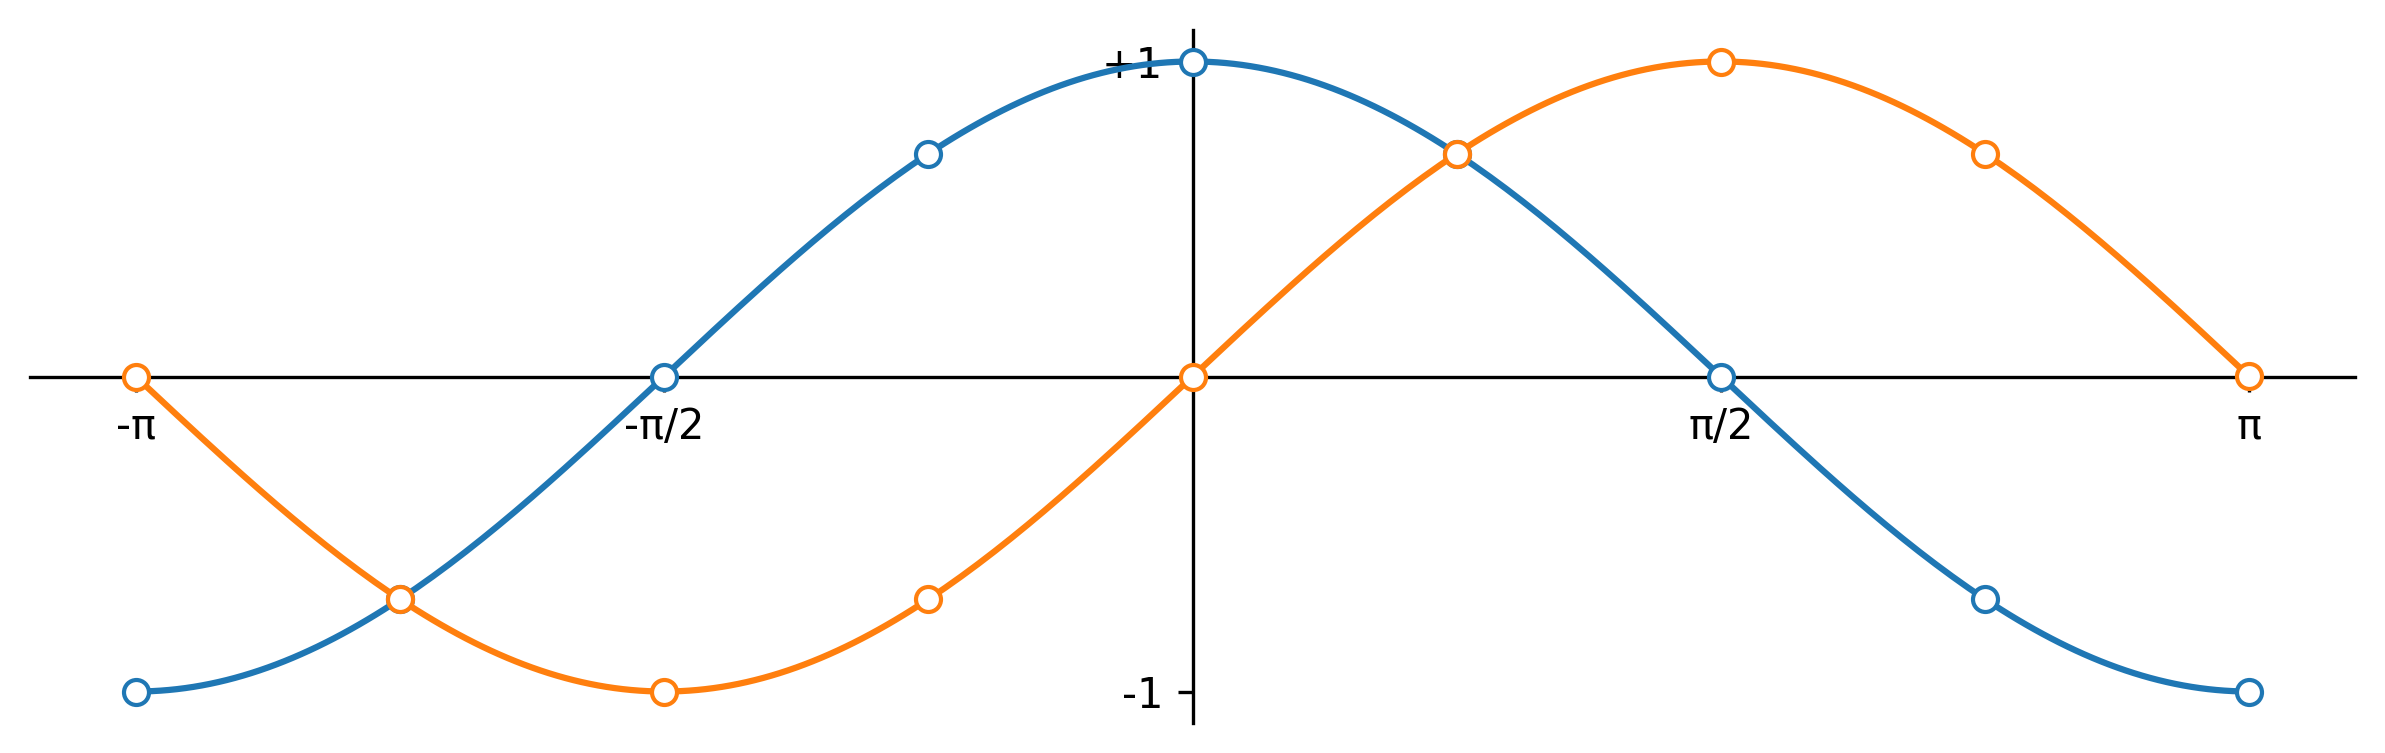

In [28]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), 
        markerfacecolor="white", zorder=10)
ax.plot(X, S, marker="o", markevery=(0, 32), 
        markerfacecolor="white", zorder=10)

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show();

### Legend

Let's add a legend in the upper left corner. This only requires adding the keyword argument `label` (that will be used in the legend box) to the plot commands.

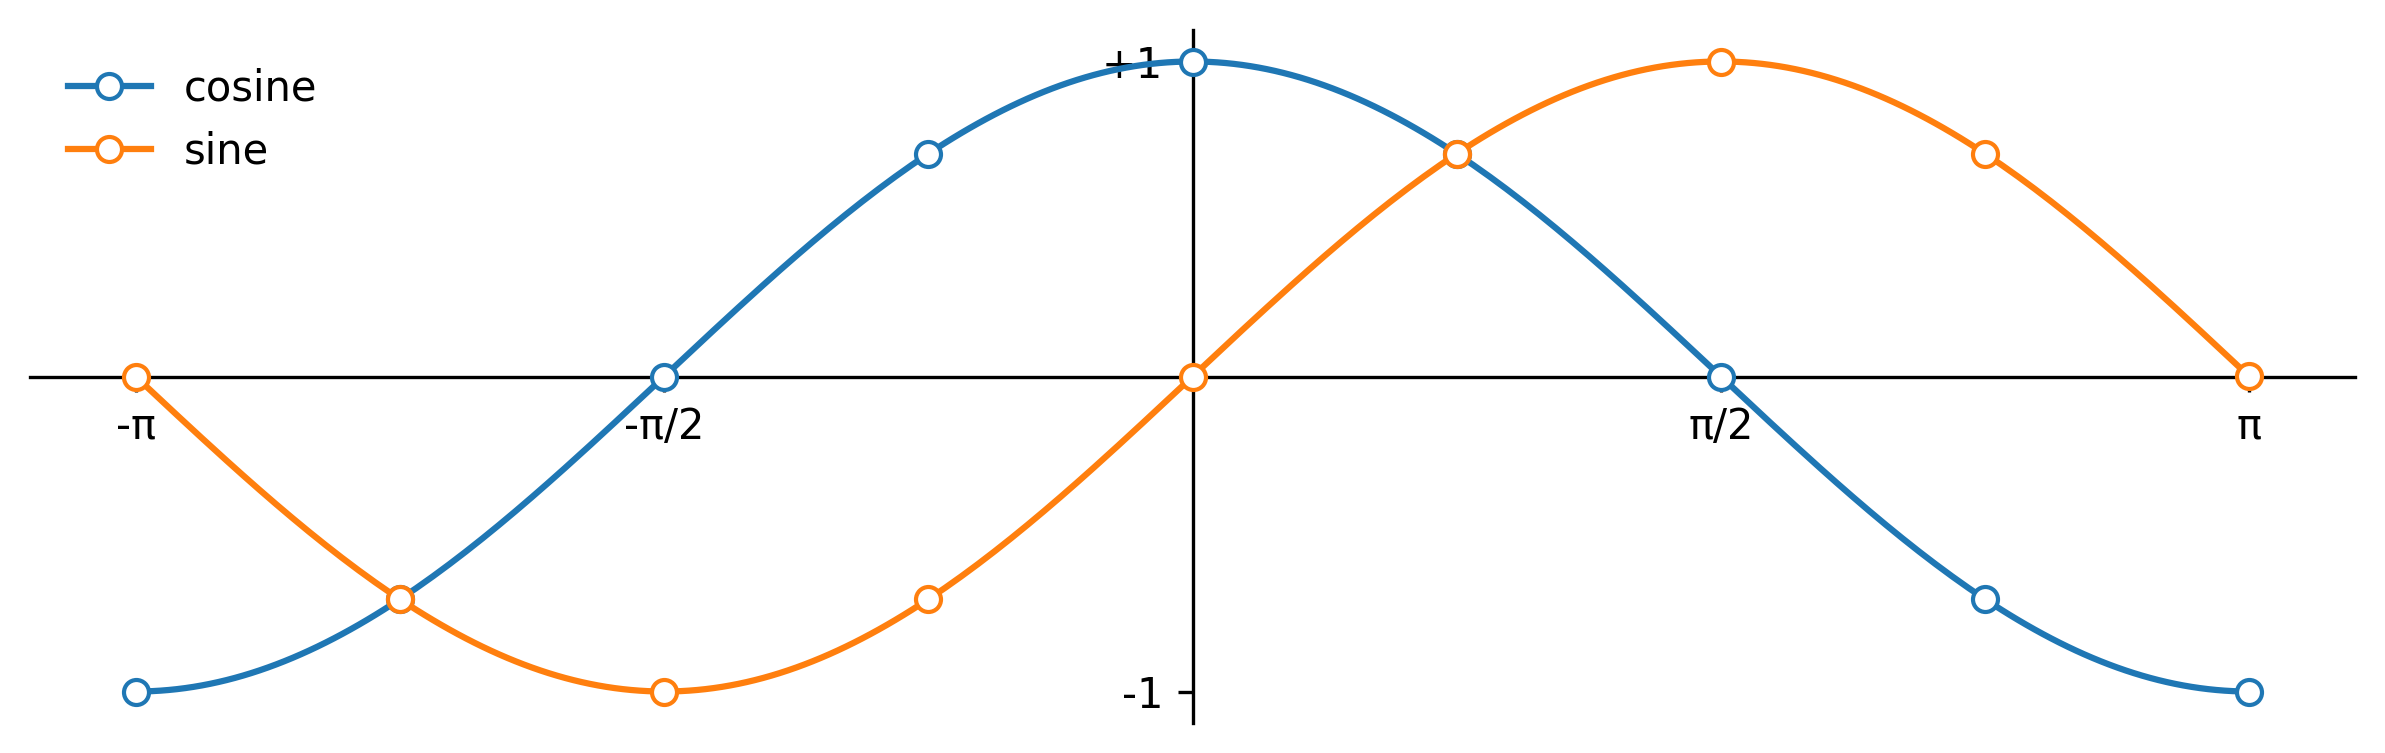

In [29]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False)

plt.show();

### Font size

The font size of the tick labels is a bit small. Let's increase it a bit.

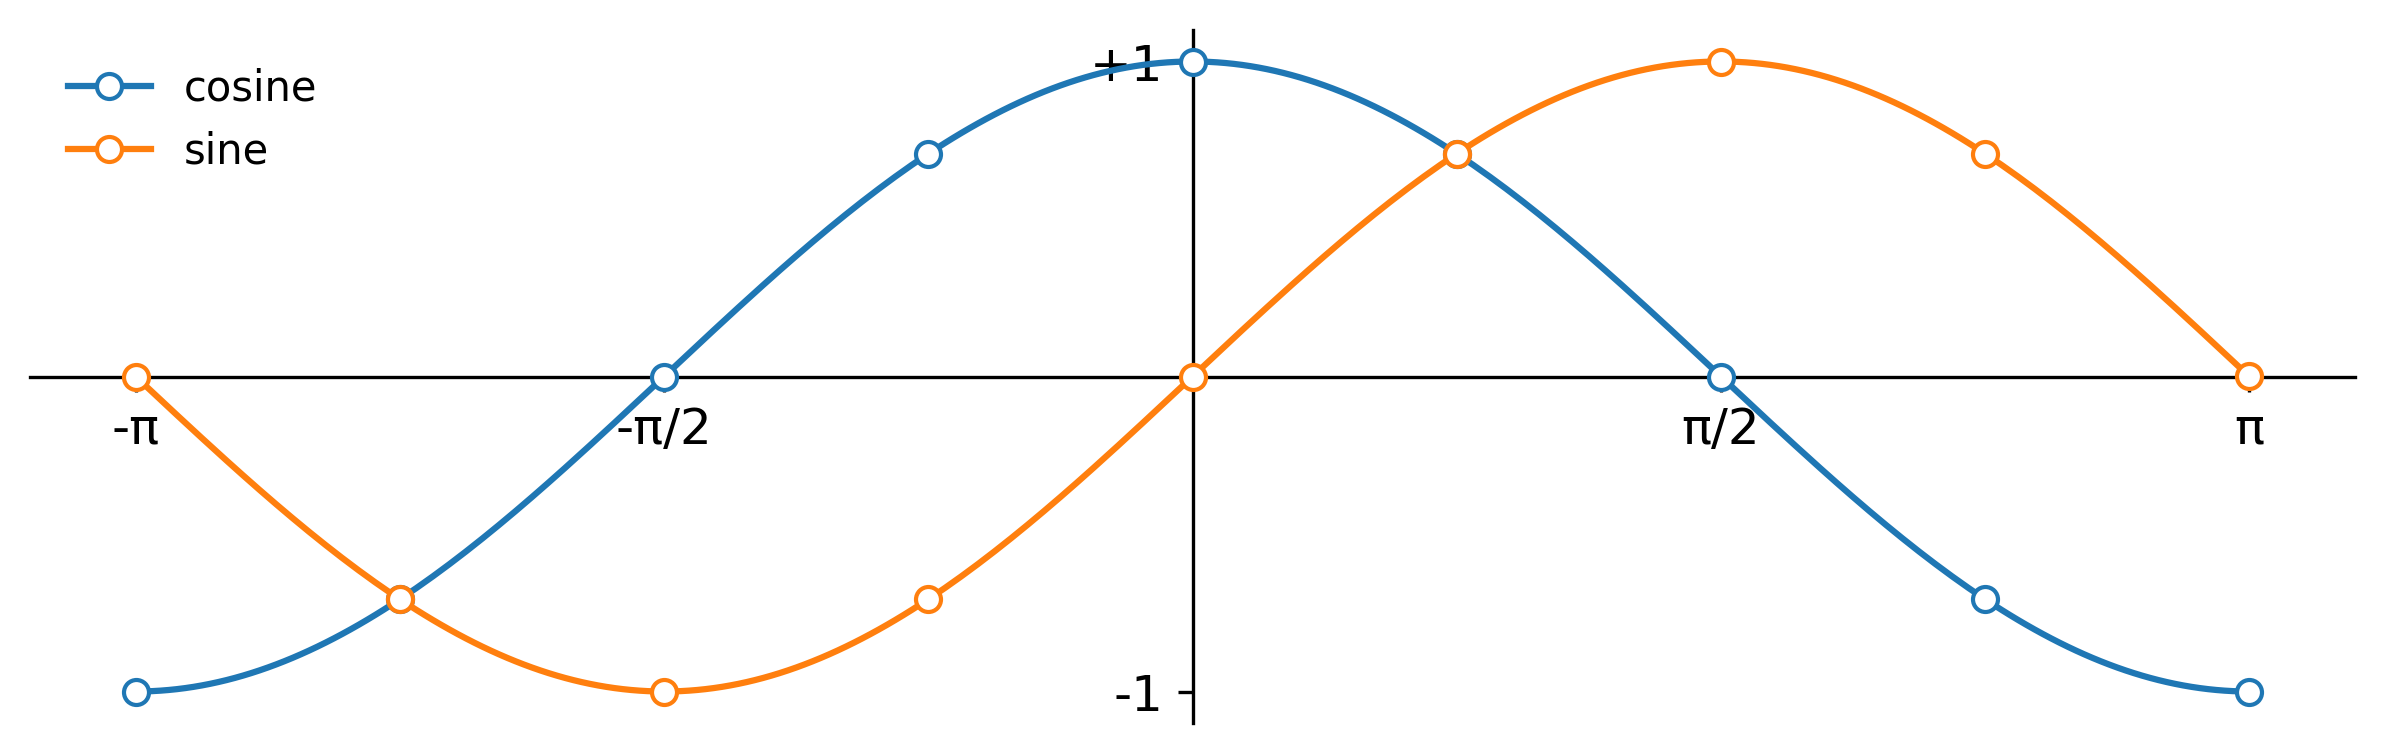

In [30]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");

plt.show();

### Title

We're almost done. Let's now add a title on the left of our figure.

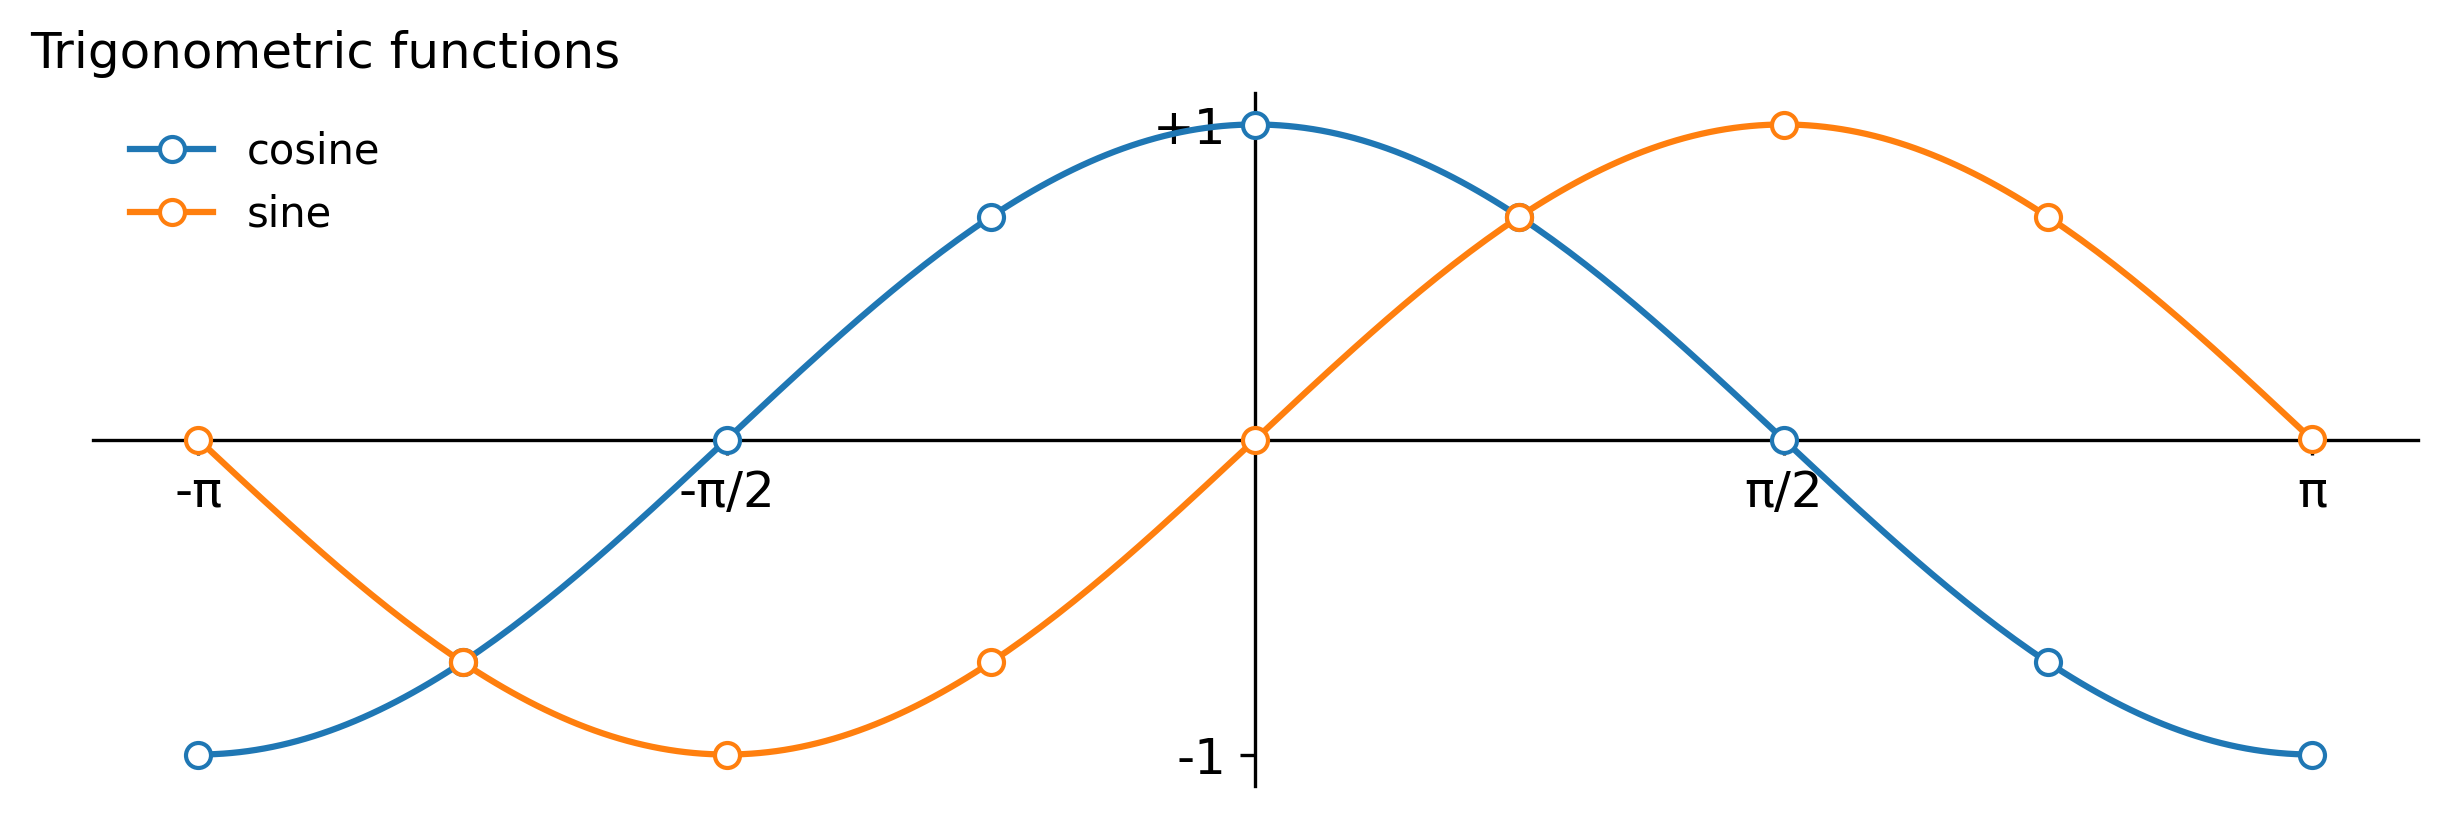

In [31]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);
ax.set_title("Trigonometric functions", x=0.1)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large")
    
plt.show();

## Saving results

We can now save our figure in a file using the PDF format. This is a vector format and this means the quality of the figure will be flawless independently of the zoom level.

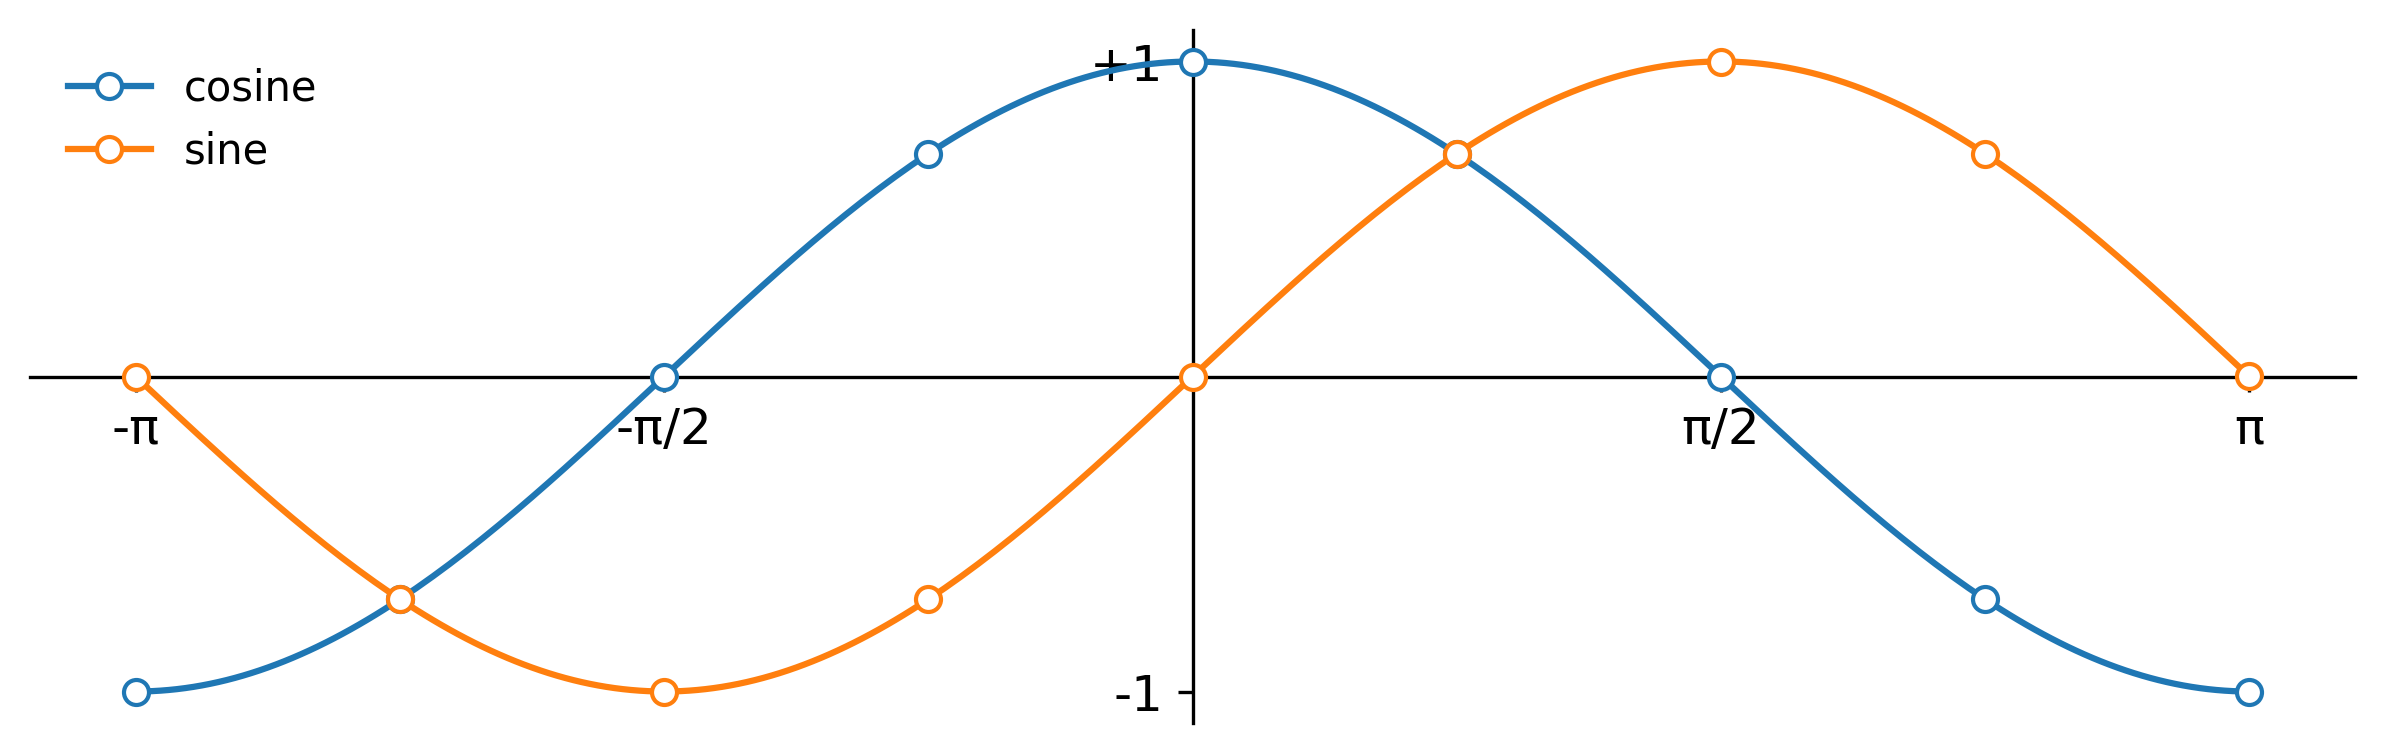

In [33]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");
    
plt.savefig("./images/01-introduction.pdf")

plt.show();

  
---
  
  
#  Multiple plots <a name="multiple_plots"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

So far, we've been dealing with a single plot (or `Axes` in matplotlib terminology) on a figure, but of course, Matplotlib offers the possibility to draw several plots on the same figure. The only difficulty is to express the layout of these different plots. But let's start with someting simple first

We want to split our sine and cosine plot in two different plots side by side. To do that we need to create two axes. The most straigthforward way is to use the `subplot` method and to specify the number of rows and columns:

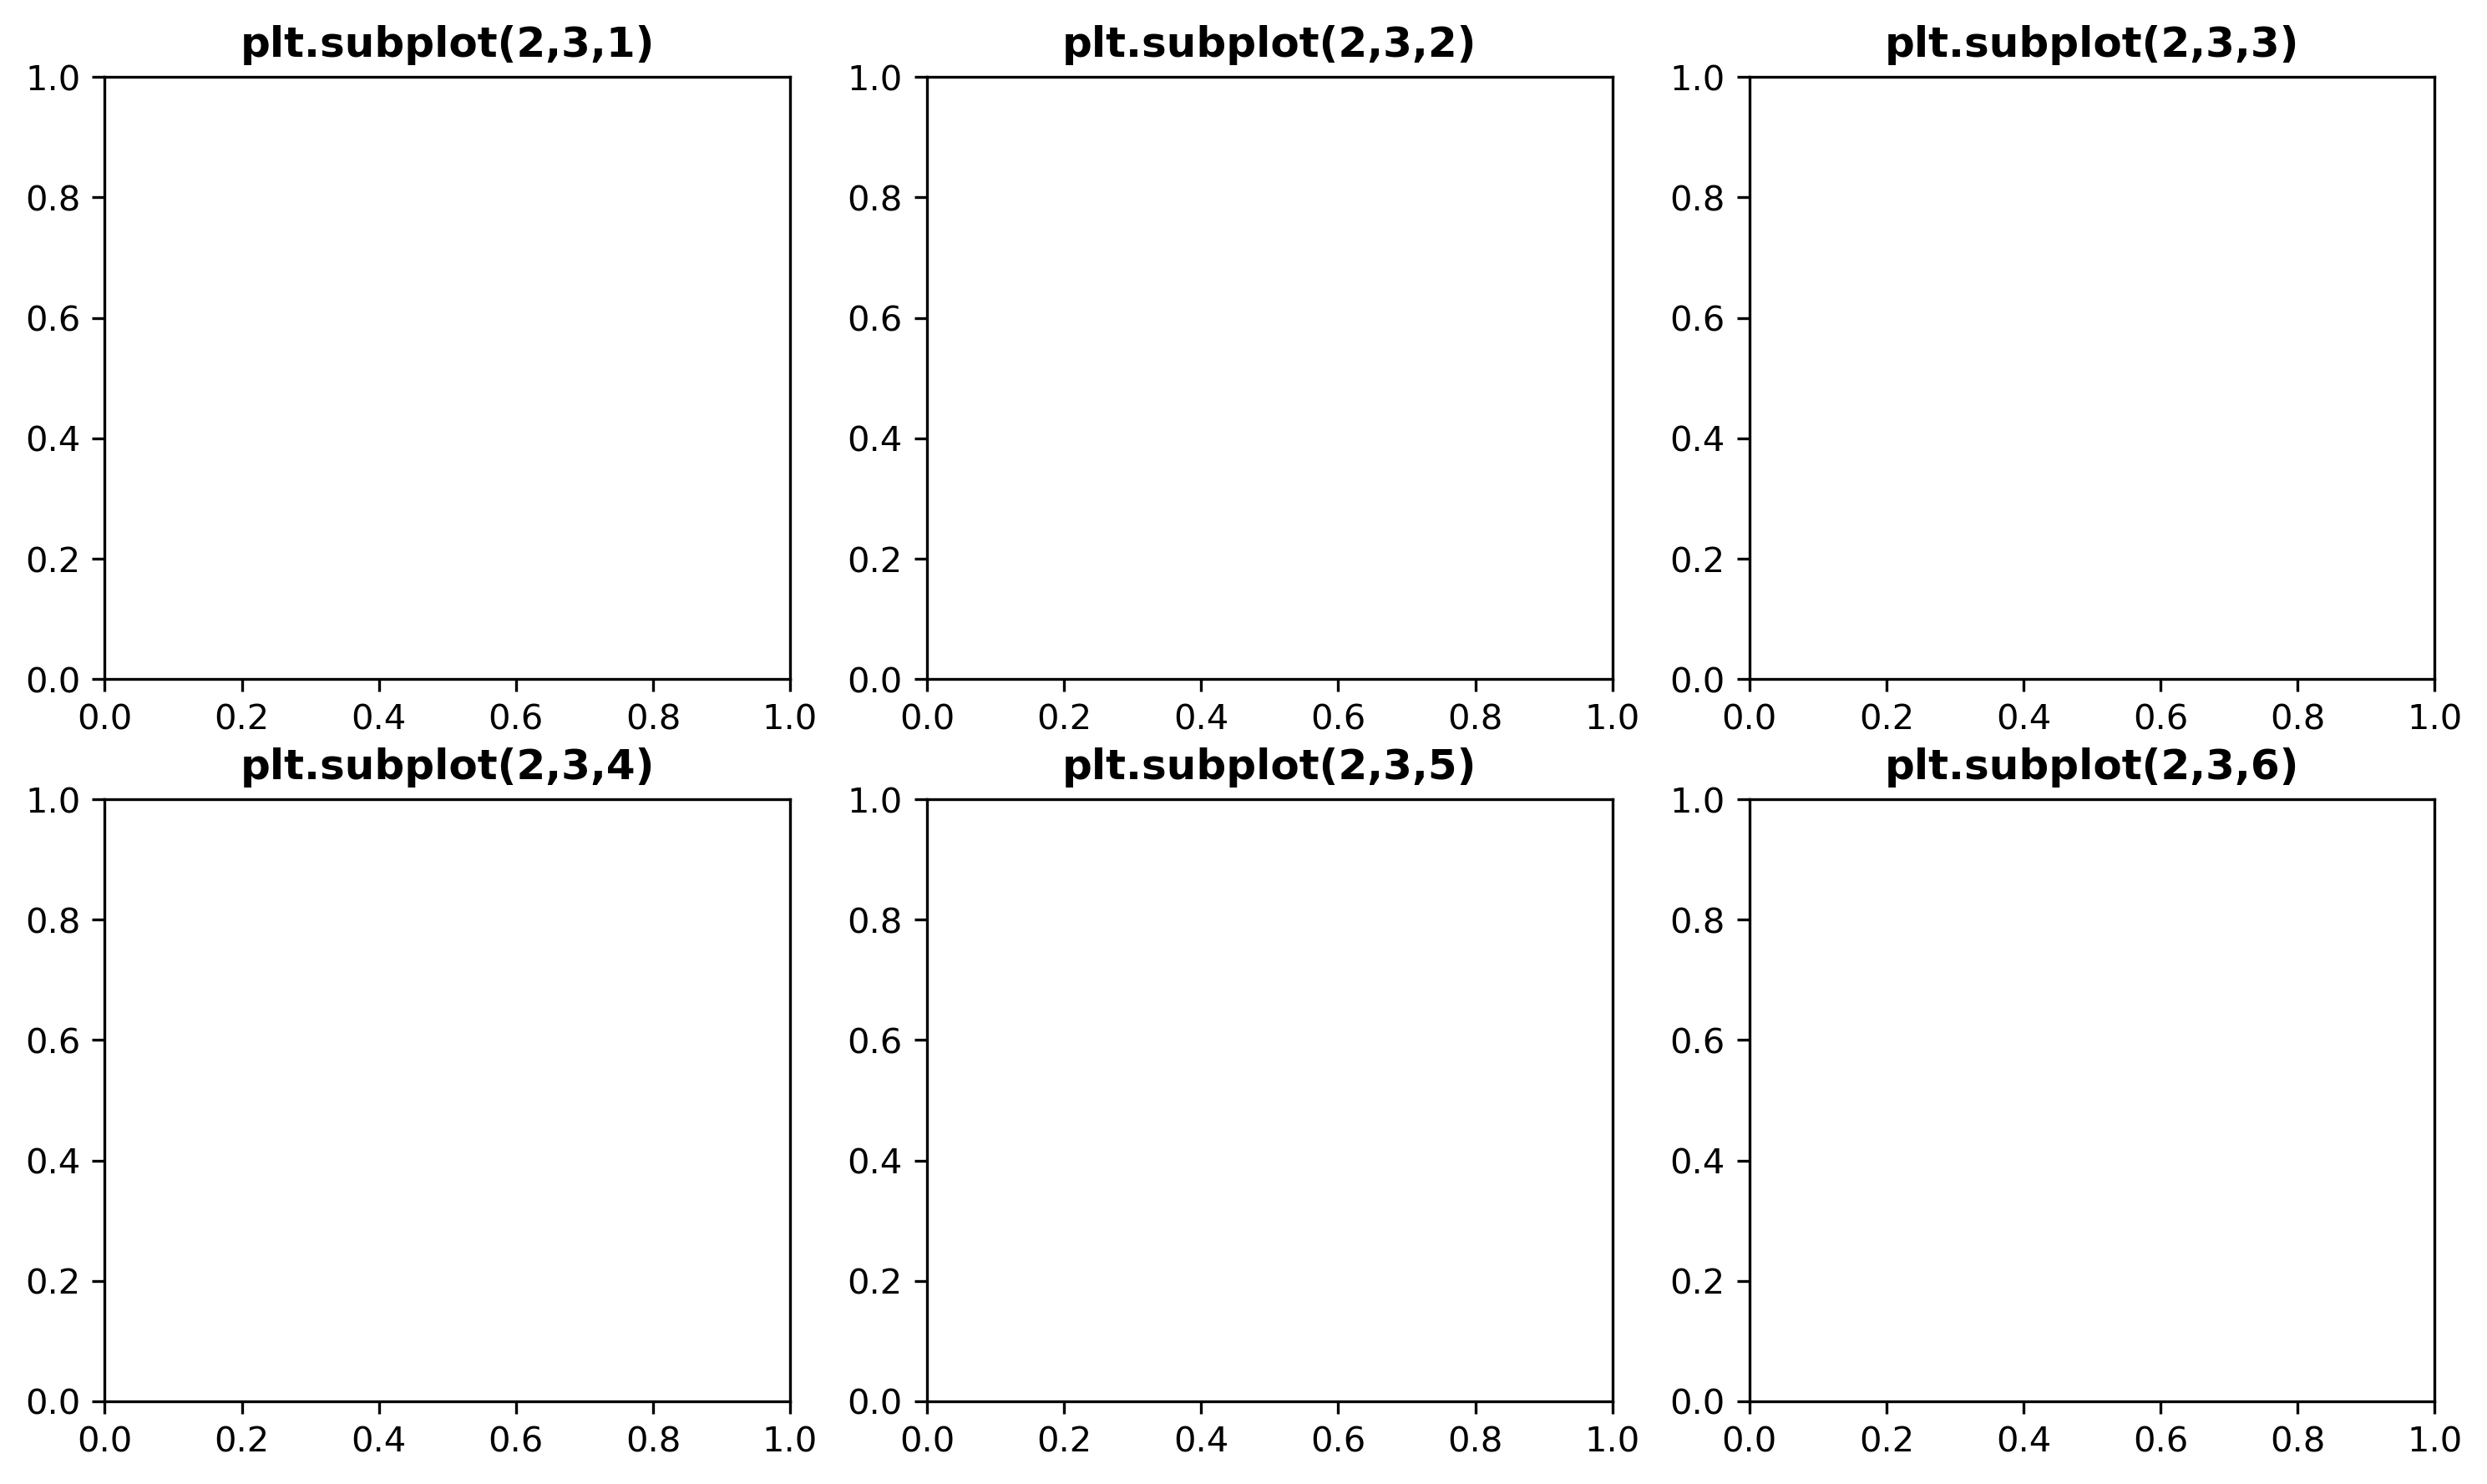

In [32]:
fig = plt.figure(figsize=(12,7))
nrows, ncols = 2, 3
for index in range(1,nrows*ncols+1):
    ax = plt.subplot(nrows, ncols, index);
    ax.set_title("plt.subplot(%d,%d,%d)" % (nrows, ncols, index), weight="bold")
    
plt.show();

The syntax is straigforward as long as you know that Axes indices go from left to right and top to bottom. Back to our example, we need one row and two columns.

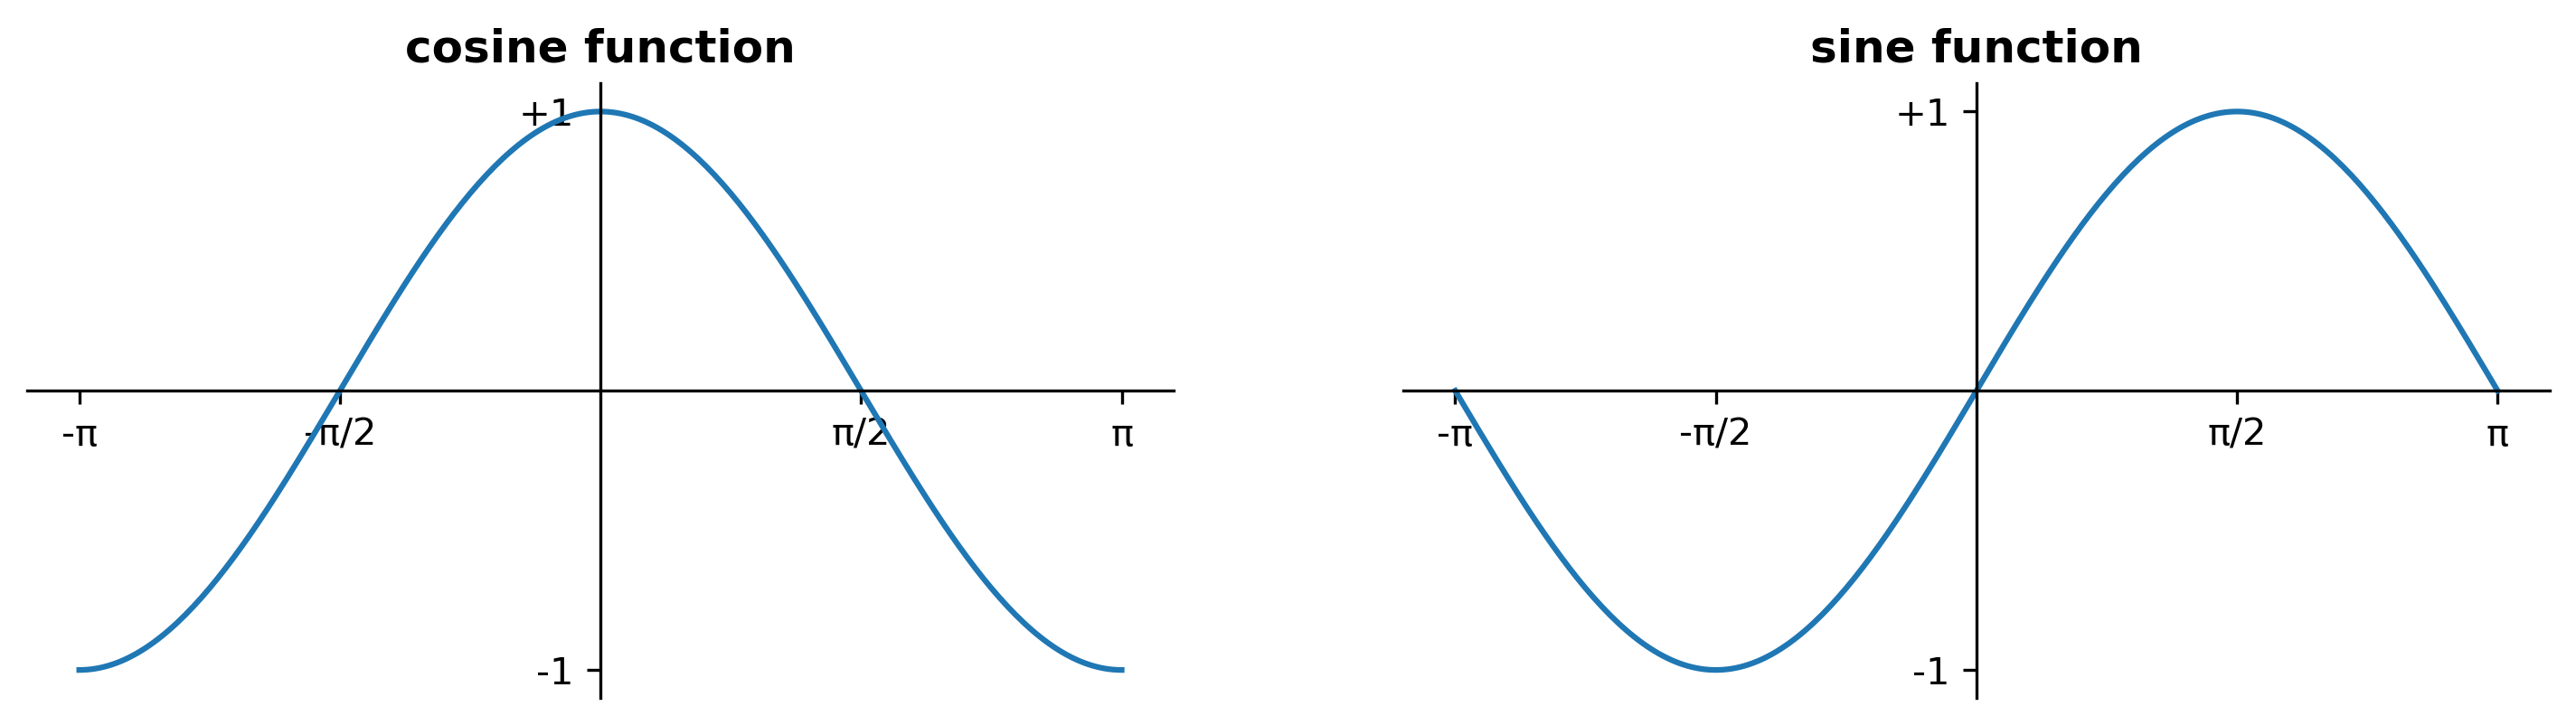

In [33]:
fig = plt.figure(figsize=(12,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

def plot(ax, X, Y, title=""):
    ax.plot(X,Y)
    
    ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
    ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
    ax.set_yticks([-1, 1])
    ax.set_yticklabels(["-1", "+1"])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    
    ax.set_title(title, weight="bold")

plot(ax1, X, C, "cosine function")
plot(ax2, X, S, "sine function")

plt.show();

What if we want to have more complex layout with plot of unequal size? In this case, the best is to use the [gridspec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) method. It also involves dividing the figure into rows and columns, but now we can specify the bounds of each plot, i.e. position and extent and their relative size. Let's see some example.

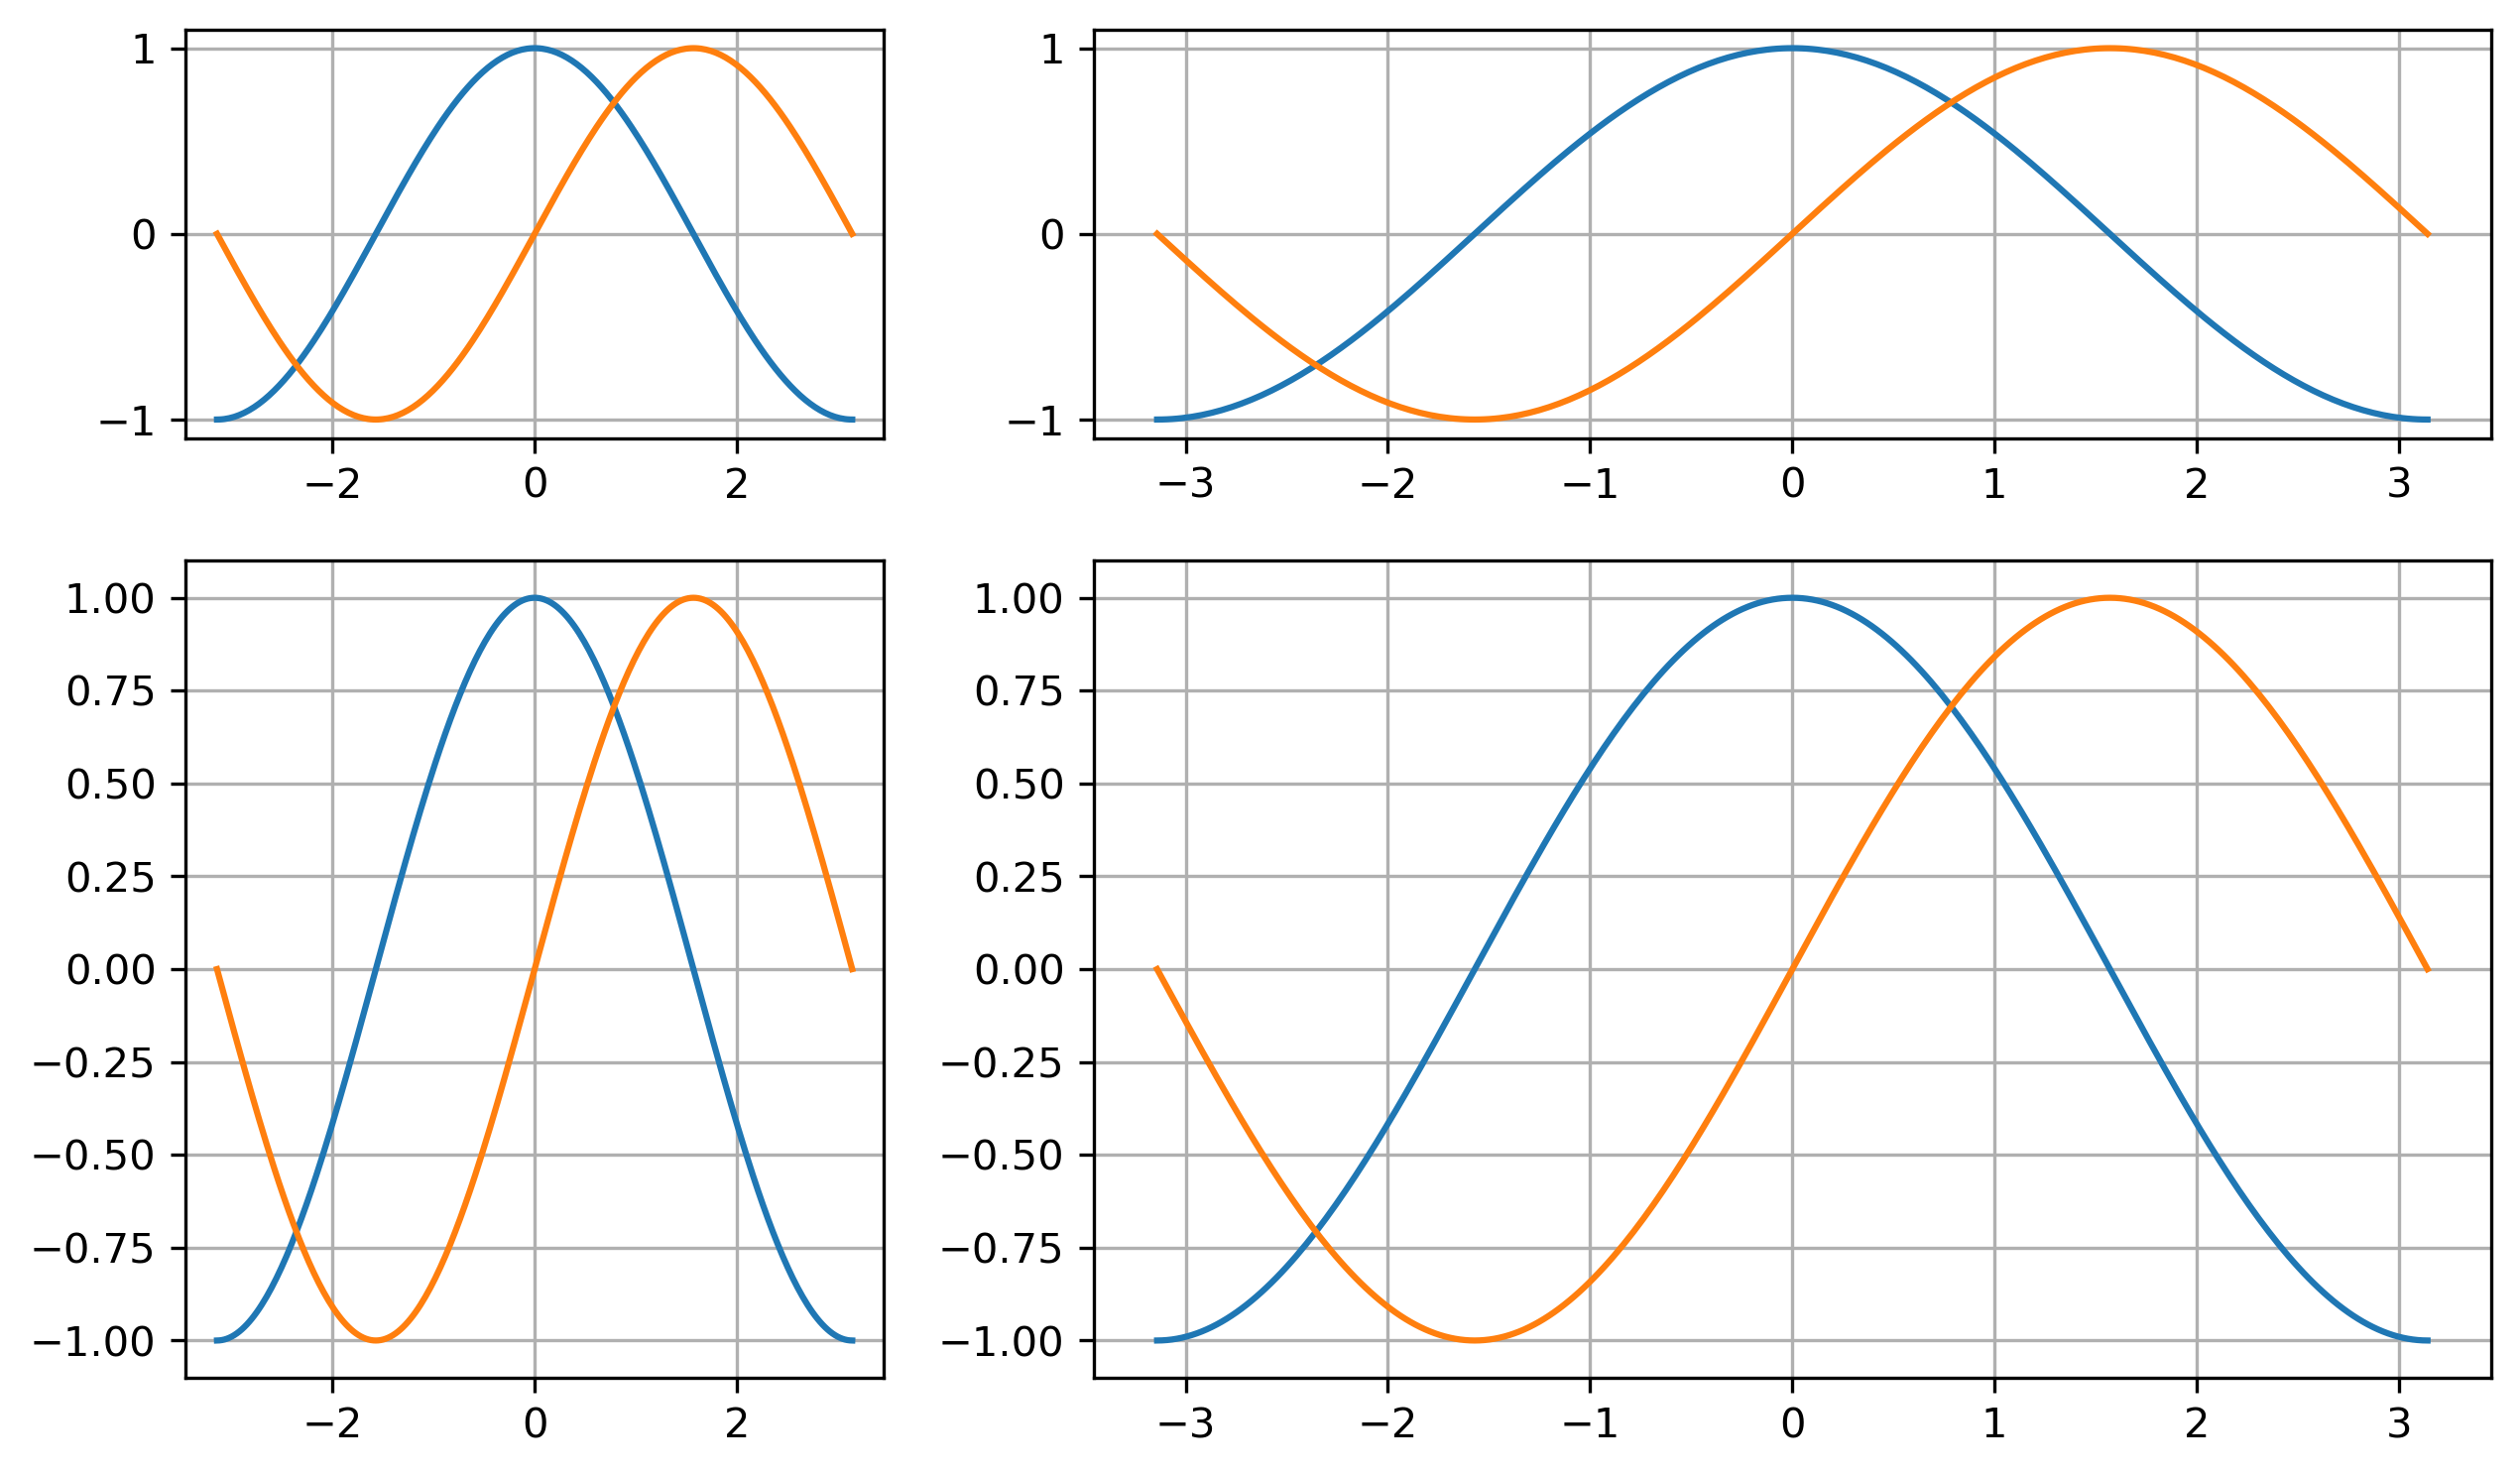

In [34]:
fig = plt.figure(figsize=(10,6))
from matplotlib.gridspec import GridSpec
    
nrows, ncols = 2, 2
widths = 1, 2  # Experiment changing 2 to 3,4,5, etc
heights = 1, 2 # Experiment changing 2 to 3,4,5, etc
G = GridSpec(nrows, ncols, width_ratios = widths, height_ratios=heights)

aspect= 'auto' # Experiment with aspect=1
ax = plt.subplot(G[0,0], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)
ax = plt.subplot(G[1,0], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)
ax = plt.subplot(G[0,1], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)
ax = plt.subplot(G[1,1], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)

plt.show();

Using gridspec, you can specify any layout, the only difficulty being to be able to express what you want to achieve.

# Ticks and labels <a name="ticks"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

We have already manipulated ticks and tick labels in the previous sections but we only slighlty modified them. In fact, there exists a failry extented machinery in matplotlib that allows you to put ticks at any position using any formats (for the label). Let's start with a very simple example.

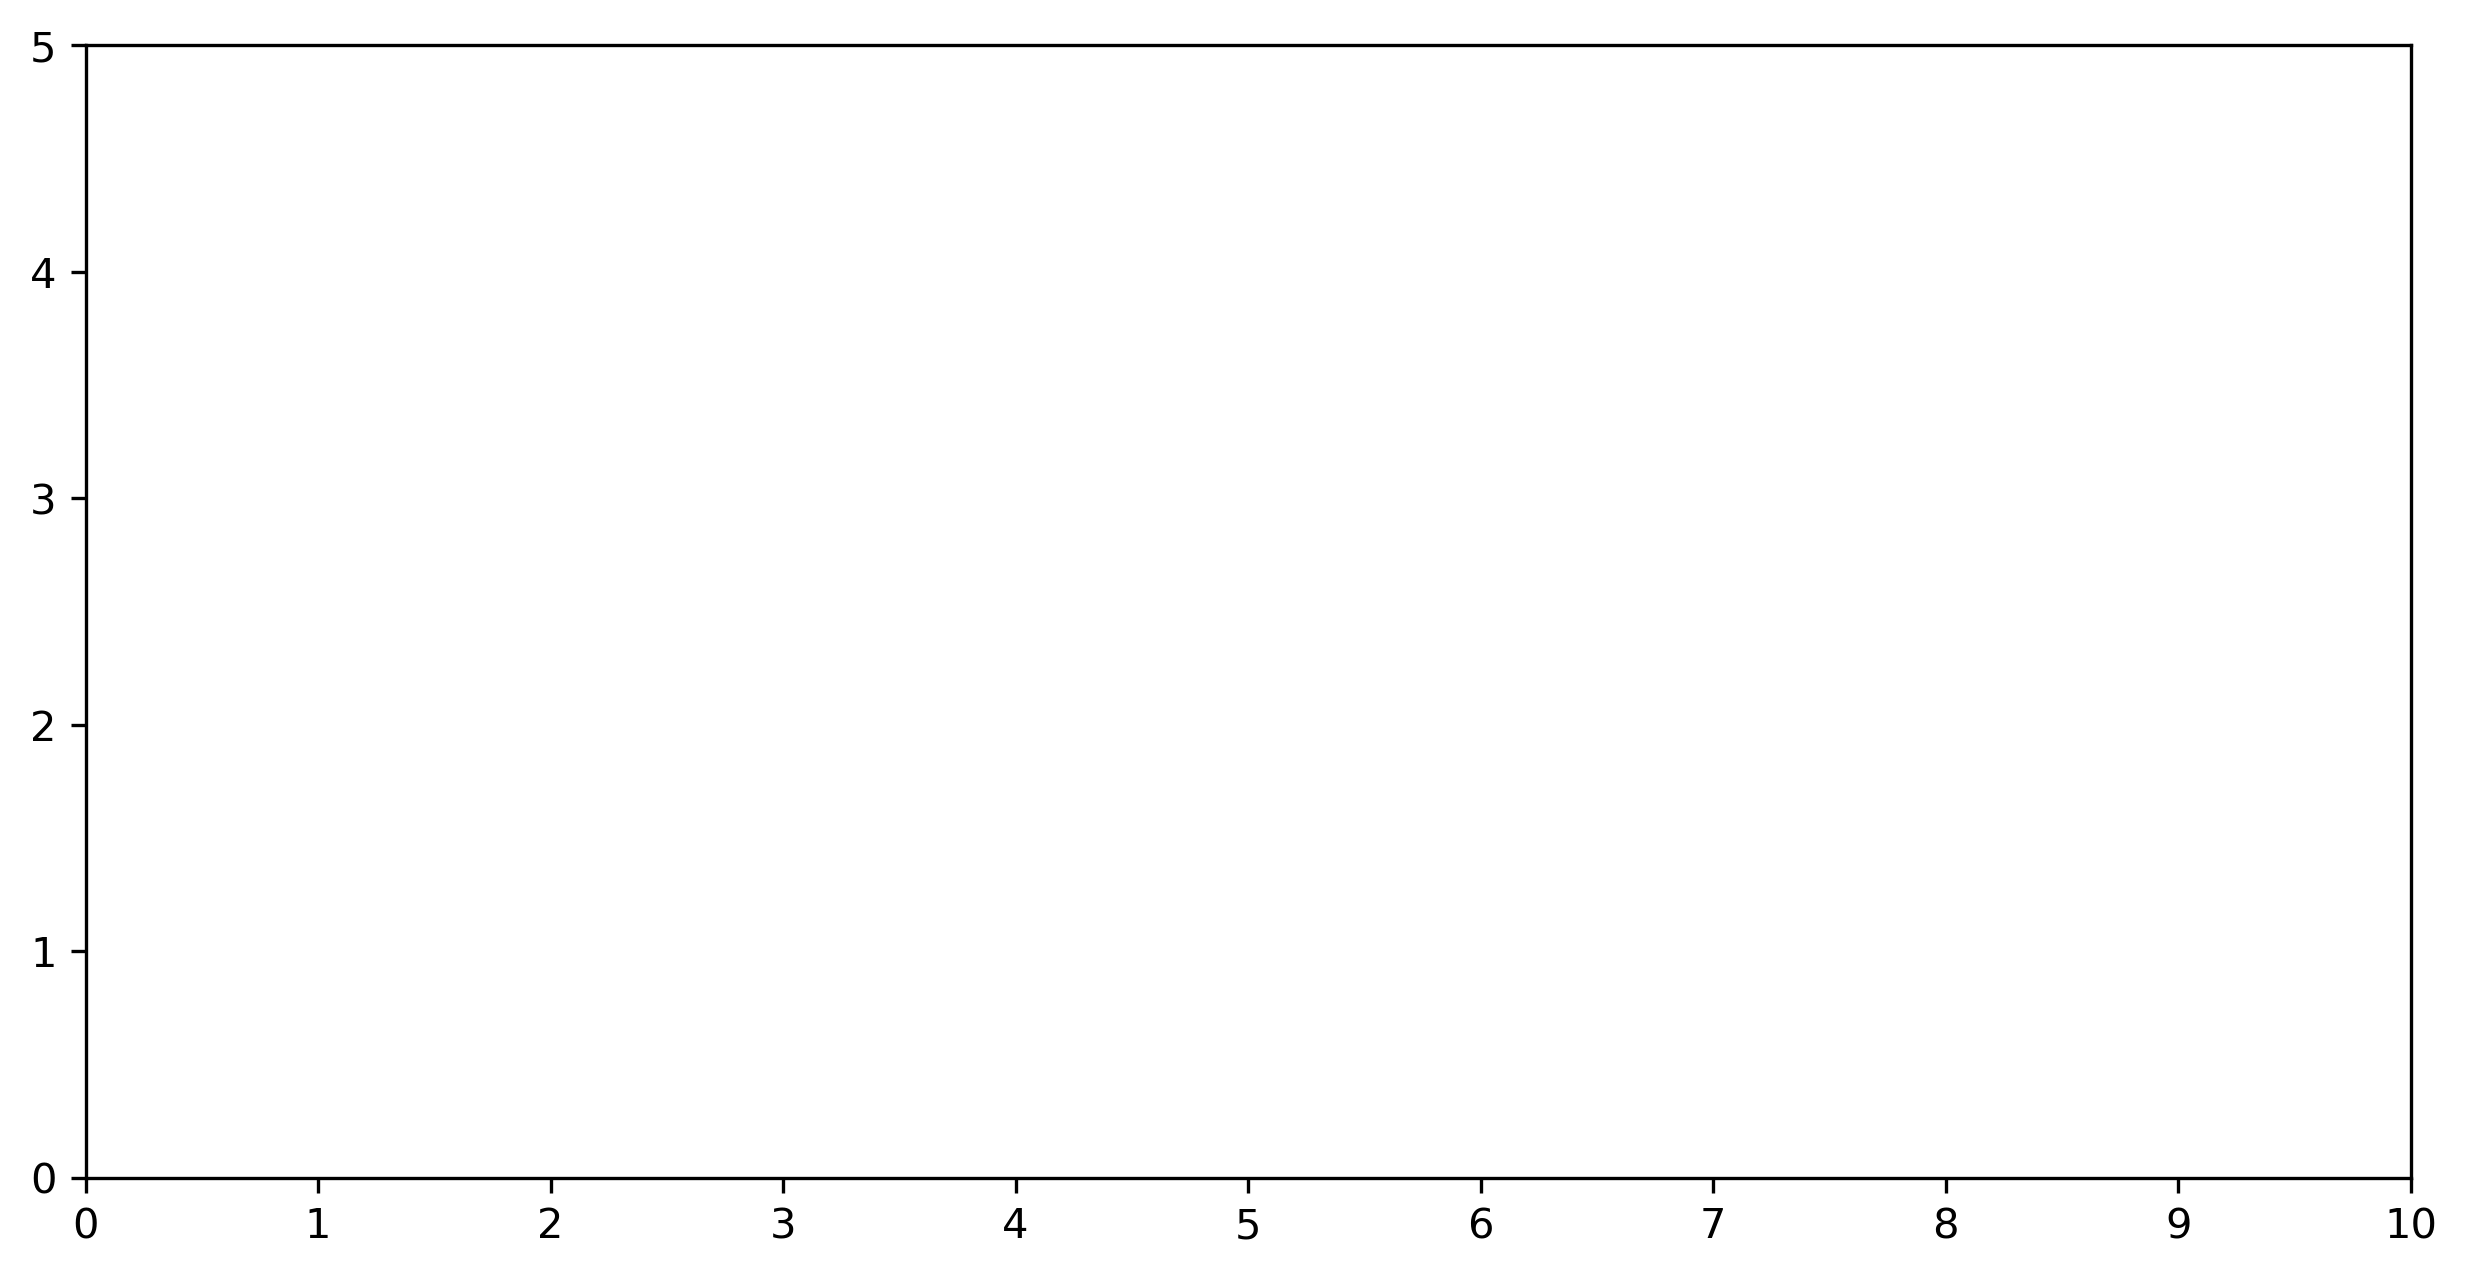

In [35]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

ax.set_xlim(0,10);
ax.set_ylim(0,5);

ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))

plt.show();

This output of this first example is not fundamentally different from what we've seen so far. But the way to obtain this result is different because we use a `MultipleLocator` descriptor that instructs matplotlib to put major ticks at every unit ( `1.0` ) on the x and y axis. But we can also do the same for minor ticks.

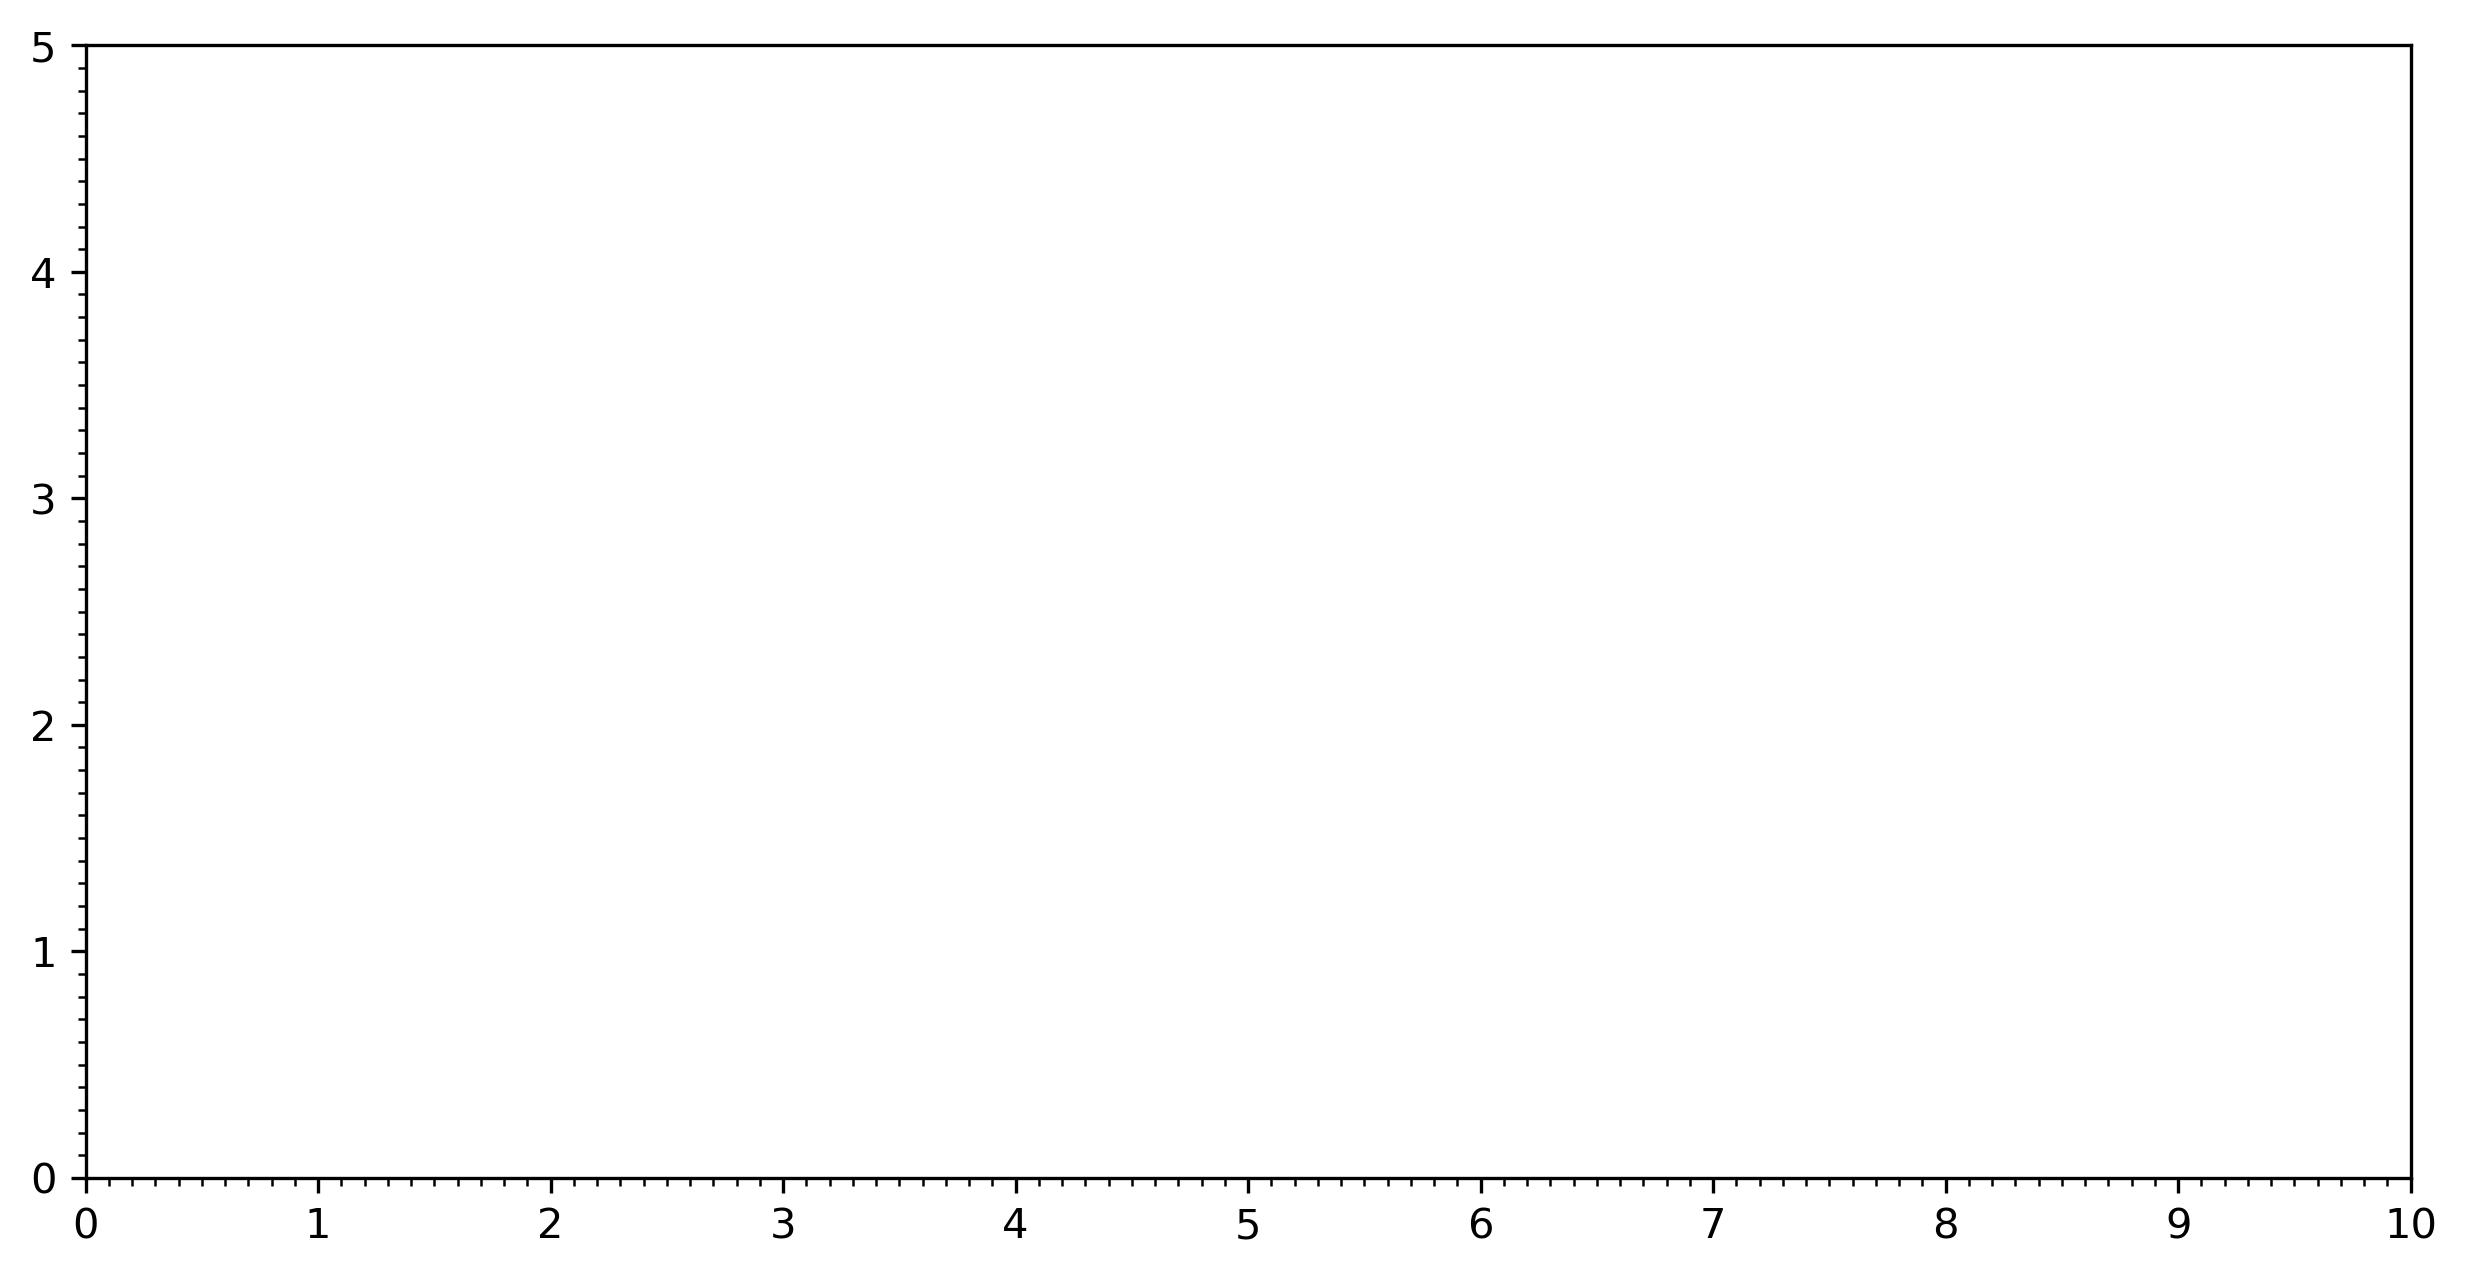

In [36]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

ax.set_xlim(0,10)
ax.set_ylim(0,5)

ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.show();

We can also modify the labels under ticls. Let's make thme bold and white on black.

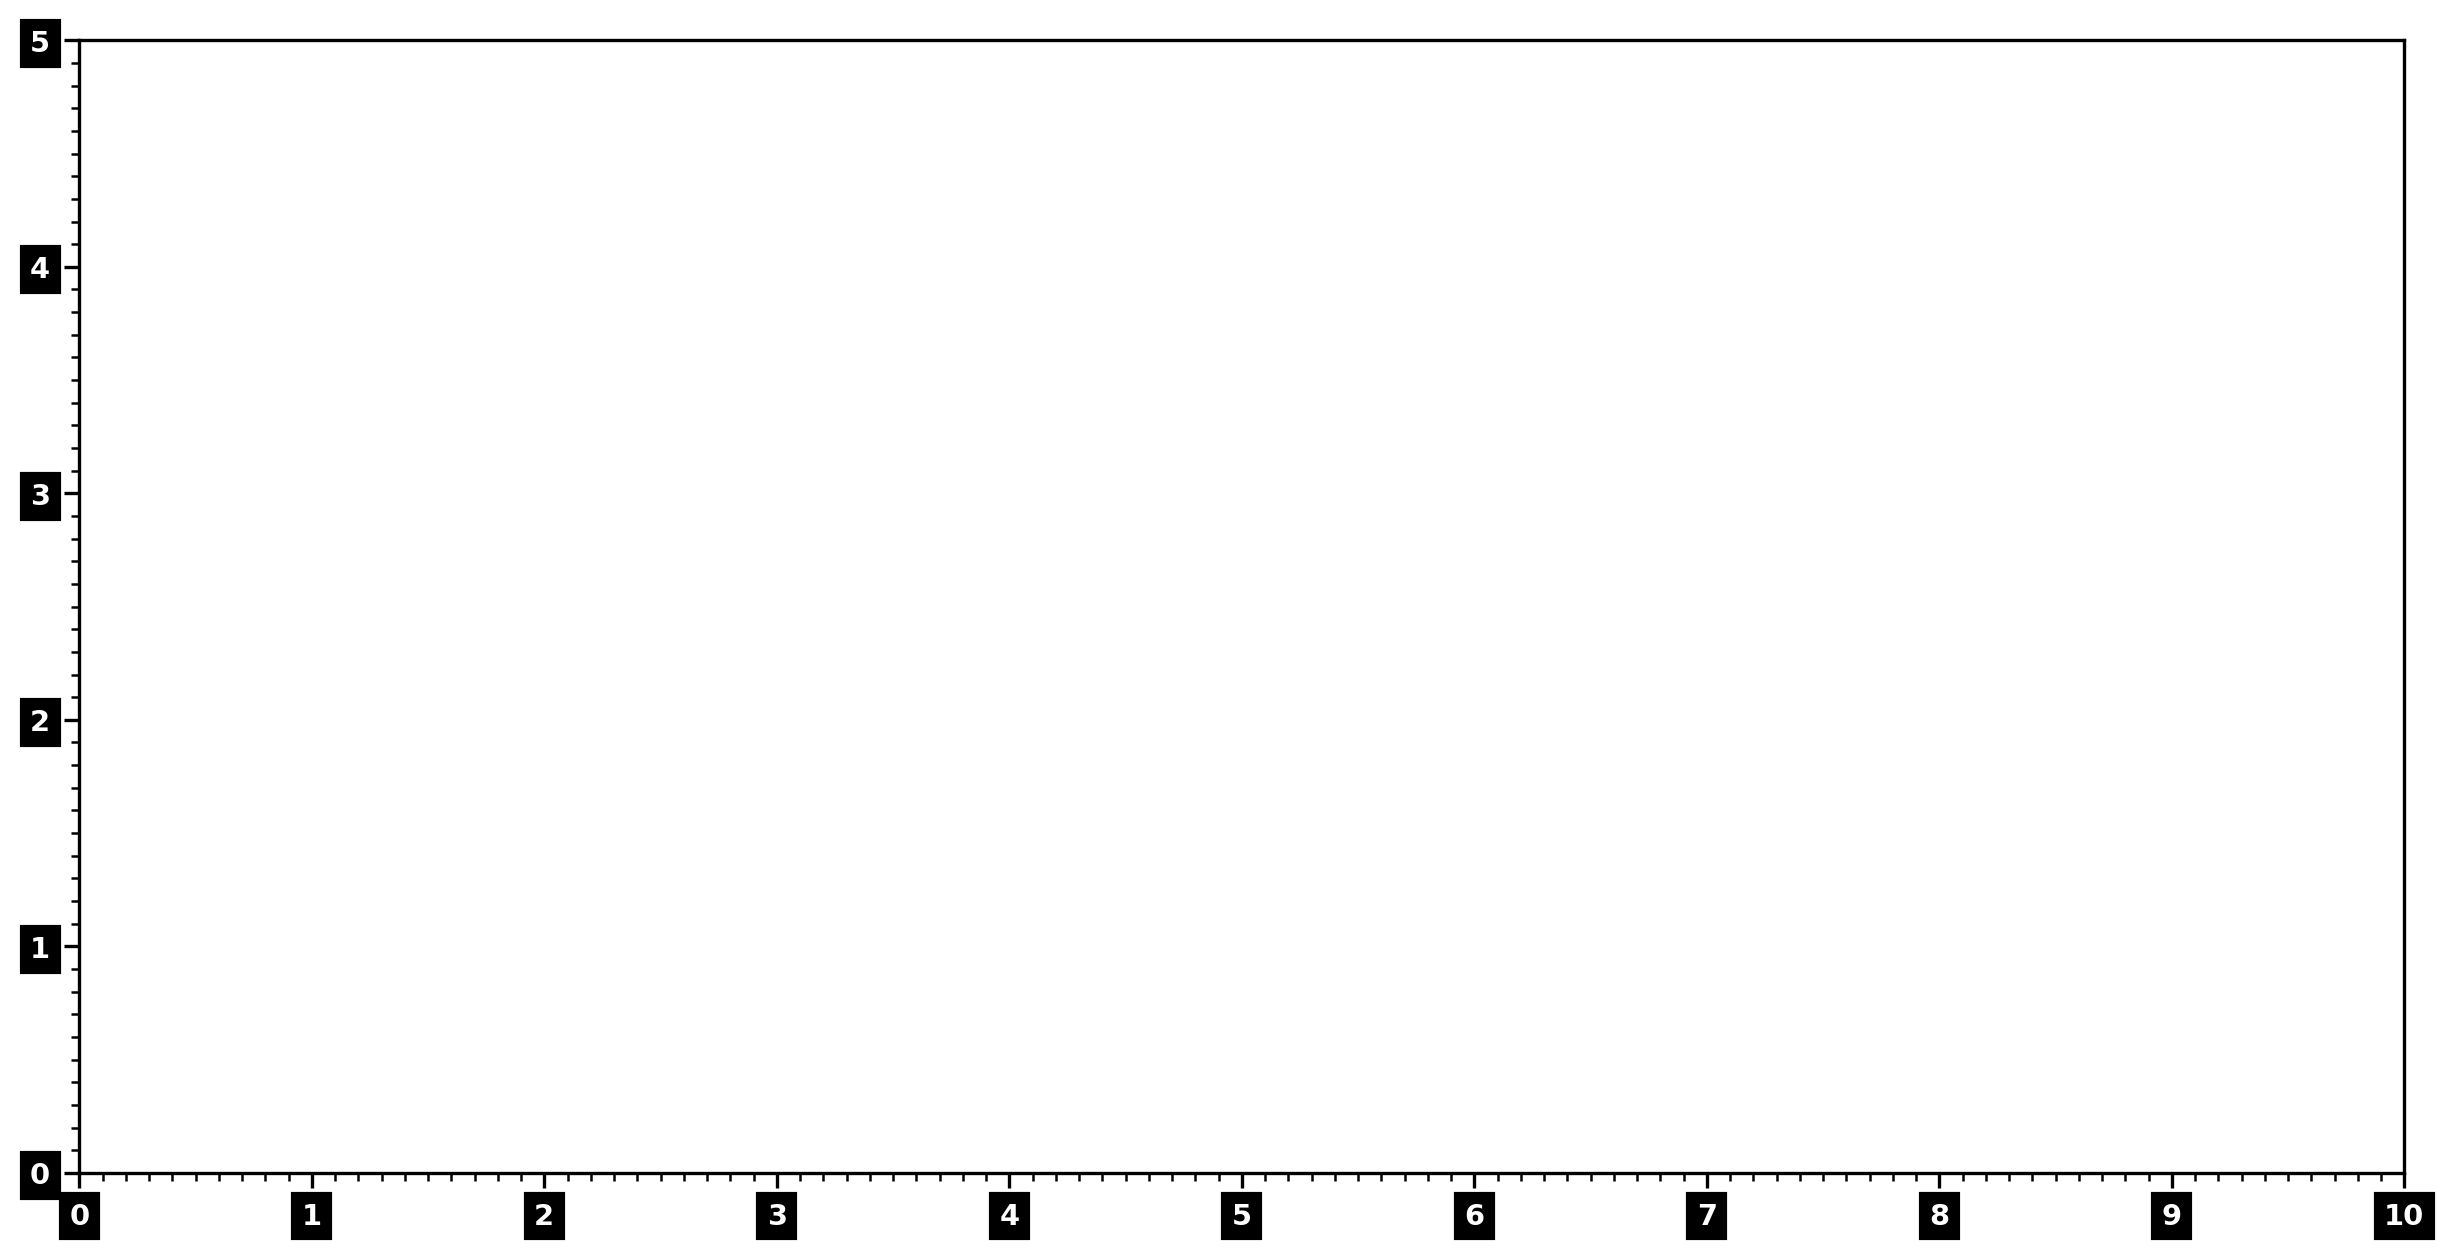

In [38]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

ax.set_xlim(0,10);
ax.set_ylim(0,5);

ax.xaxis.set_major_locator(MultipleLocator(1.0));
ax.yaxis.set_major_locator(MultipleLocator(1.0));

ax.xaxis.set_minor_locator(MultipleLocator(0.1));
ax.yaxis.set_minor_locator(MultipleLocator(0.1));

for label in ax.yaxis.get_ticklabels() + ax.xaxis.get_ticklabels():
    label.set_fontweight("bold");
    label.set_fontsize("x-small");
    label.set_color("white");
    label.set_bbox(dict(facecolor='black', linewidth=1, edgecolor='0.0', pad=2))
    
plt.show();

  
---
  

# Exercises <a name="exercises"></a>  <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

## Better typography 

We used π/2 to display pi over two to but it would be better to display $\frac{\pi}{2}$. How would you do modify the tick labels such a to obtain the same output as in the figure below?

**Hint:** You can edit this notebook cell to see how I wrote $\frac{\pi}{2}$.

<img src="data/01-exercise-1.png" width="100%" />

## Better style 

Starting from the code template below, you need to write the subplot function to achieve the same result as the figure below. The only difficulty are the arrows at end of x and y axis. To plot them, you can plot them using specific [markers](https://matplotlib.org/stable/api/markers_api.html).

<img src="data/01-exercise-2.png" width="100%" />

In [ ]:
raise Exception("!!! To be completed")

import numpy as np
import matplotlib.pyplot as plt

def subplot(index, title):    
    # To be completed
    return ax

fig = plt.figure(figsize=(13,5), dpi=300)
X = np.linspace (-4,4,200)

subplot(1, "y = cos(x)").plot(X, np.cos(X), "C1")
subplot(2, "y = sin(x)").plot(X, np.sin(X), "C1")
subplot(3, "y = tan(x)").plot(X, np.tan(X), "C1")
subplot(4, "y = cosh(x)").plot(X, np.cosh(X), "C1")
subplot(5, "y = sinh(x)").plot(X, np.sinh(X), "C1")
subplot(6, "y = tanh(x)").plot(X, np.tanh(X), "C1")

plt.show()

----

**Copyright (c) 2021 Nicolas P. Rougier**  
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
<br/>
Code is licensed under a [2-Clauses BSD license](https://opensource.org/licenses/BSD-2-Clause)